In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import numpy as np
import regions
import os
from astropy.table import *
from tqdm import tqdm
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS
import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

#### insert inside_u and inside_us flag (NOT removing FLAG_FIELD_BINARY flag) for Vincent's catalogs

In [63]:
# cat_dir = 'clauds_cat_v2020/'  # v2 cat
# version = 'v2_v200930'

# cat_dir = '/Volumes/LejaySSD/v4_cats/'  #v4 cat
# version = 'v4_v201129'

# cat_dir = '/Volumes/LejaySSD/v6_cats/'  #v6 cat
# version = 'v6_v201223'

# cat_dir = '/Volumes/LejaySSD/v8_cats/'  #v8 cat
# version = 'v8_v210116'

cat_dir = '/Volumes/LejaySSD/v9_cats/'  #v9 cat
version = 'v9'

# for cat_name in ['COSMOS_deep','XMM-LSS_deep','DEEP_deep','ELAIS_deep']:
for cat_name in ['XMM-LSS_deep']:
    print(cat_name)
    cat = Table.read(cat_dir+cat_name+'_'+version+'.fits')
    inside_hsc_col = Column(name='inside_hsc',data=cat['FLAG_FIELD_BINARY'][:,0])
    print('hsc')
    inside_u_col = Column(name='inside_u',data=cat['FLAG_FIELD_BINARY'][:,1])
    print('u')
    inside_us_col = Column(name='inside_uS',data=cat['FLAG_FIELD_BINARY'][:,2])
    print('us')
    inside_j_col = Column(name='inside_j',data=cat['FLAG_FIELD_BINARY'][:,3])
    print('j')
    if 'inside_hsc' in cat.keys():
        cat.remove_columns(['inside_hsc','inside_u','inside_uS','inside_j'])
    print('adding columns')
    cat.add_columns([inside_hsc_col,inside_u_col,inside_us_col,inside_j_col])
    print('adding columns done')
    cat.write(cat_dir+cat_name+'_'+version+'.fits', overwrite=True)

XMM-LSS_deep


KeyboardInterrupt: 

### load catalogs
v8, v9

In [13]:
# useful params catalogs
cat_name = 'COSMOS_deep'
cat_v8 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name+'_v8_gal_cut_params.fits')
cat_v9 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name+'_v9_gal_cut_params.fits')

# total number of objects
print("Vincent's v8 catalog", len(cat_v8))
print("Vincent's v9 catalog", len(cat_v9))

Vincent's v8 catalog 2727465
Vincent's v9 catalog 1114083


### compare v8 and v9 catalogs

1. inside u geometry
2. not masked
3. classified as galaxies

In [16]:
# select galaxies
cat_v8_gal = cat_v8[cat_v8['OBJ_TYPE'] == 0]
cat_v9_gal = cat_v9[cat_v9['OBJ_TYPE'] == 0]

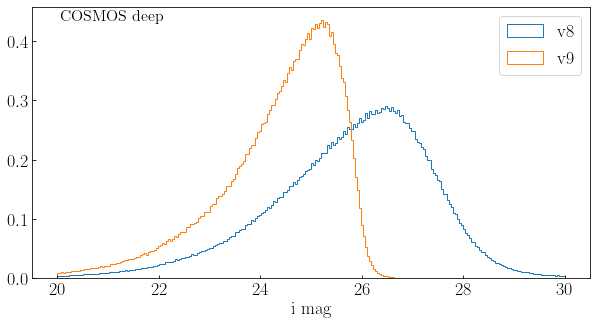

In [17]:
fig = plt.figure(figsize=(10,5))
plt.hist(cat_v8_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v8')
plt.hist(cat_v9_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v9')
plt.xlabel('i mag',fontsize=18)
plt.annotate(cat_name.replace('_',' '),xy=([0.05,0.95]),xycoords='axes fraction',fontsize=16)
plt.legend(fontsize=18)
plt.show()

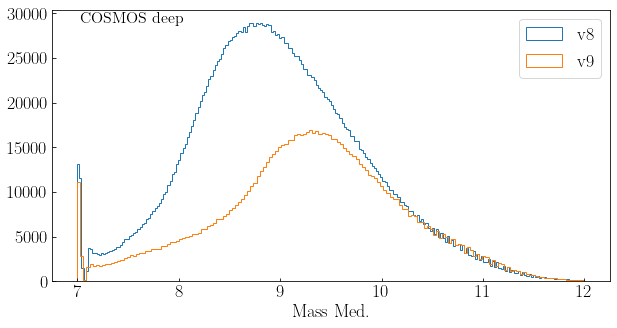

In [18]:
fig = plt.figure(figsize=(10,5))
plt.hist(cat_v8_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',label='v8')
plt.hist(cat_v9_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',label='v9')
plt.xlabel('Mass Med.',fontsize=18)
plt.annotate(cat_name.replace('_',' '),xy=([0.05,0.95]),xycoords='axes fraction',fontsize=16)
plt.legend(fontsize=18)
plt.show()

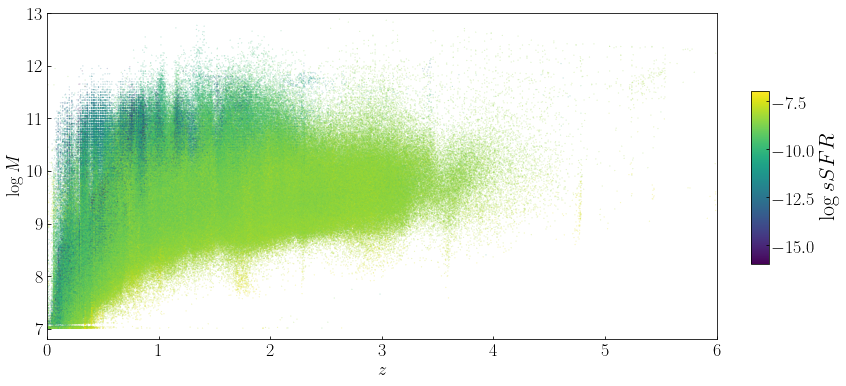

In [68]:
# mass vs z plot
fig = plt.figure(figsize=(12,6))
im = plt.scatter(cat_v9_gal['ZPHOT'],cat_v9_gal['MASS_MED'],s=0.01,c=cat_v9_gal['SSFR_MED'],vmin=-16,vmax=-7)
plt.xlim([0,6])
plt.ylim([6.8,13])

plt.xlabel(r'$z$', fontsize=18)
plt.ylabel(r'$\log M$', fontsize=18)

cb_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel(r'$\log sSFR$',fontsize=22)
plt.show()

### catalog comparison
#### inside j vs. outside j in v9

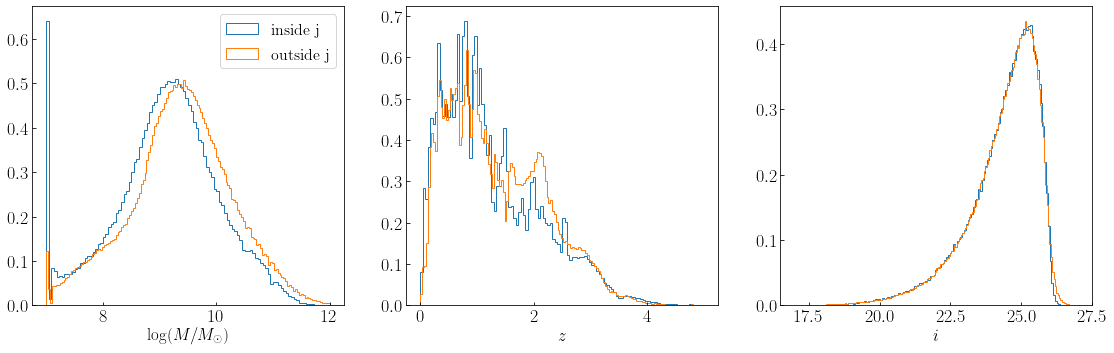

In [98]:
# inside_j vs. outside_j
cat_v9_gal_z = cat_v9_gal[cat_v9_gal['Z_ML']<10]
cat_v9_inside_j = cat_v9_gal_z[cat_v9_gal_z['inside_j']==True]
cat_v9_outside_j = cat_v9_gal_z[cat_v9_gal_z['inside_j']==False]

fig, axs = plt.subplots(1, 3, figsize=(19,5.5))

# panel1 : mass distribution comparison
axs[0].hist(cat_v9_inside_j['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='inside j')
axs[0].hist(cat_v9_outside_j['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='outside j')
axs[0].legend(fontsize=16)
axs[0].set_xlabel('$\log(M/M_\odot)$',fontsize=17)

# panel2 : z distribution comparison
axs[1].hist(cat_v9_inside_j['ZPHOT'],bins='scott',range=(0,5),histtype='step',density=True,label='inside j')
axs[1].hist(cat_v9_outside_j['ZPHOT'],bins='scott',range=(0,5),histtype='step',density=True,label='outside j')
axs[1].set_xlabel('$z$',fontsize=17)

# panel3 : 
axs[2].hist(cat_v9_inside_j['i'],bins='scott',range=(17,27),histtype='step',density=True,label='inside j')
axs[2].hist(cat_v9_outside_j['i'],bins='scott',range=(17,27),histtype='step',density=True,label='outside j')
axs[2].set_xlabel('$i$',fontsize=17)

plt.show()

#### inside j vs. outside j in v10

no mask, galaxy classification, inside_u

In [9]:
# load v10 catalog

cat_v10 = Table.read('clauds_cat_v2020/COSMOS_deep_v10_gal_cut_params.fits')
cat_v10 = cat_v10[cat_v10['inside_u'] == True]
cat_v10_gal = cat_v10[cat_v10['OBJ_TYPE'] == 0]

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


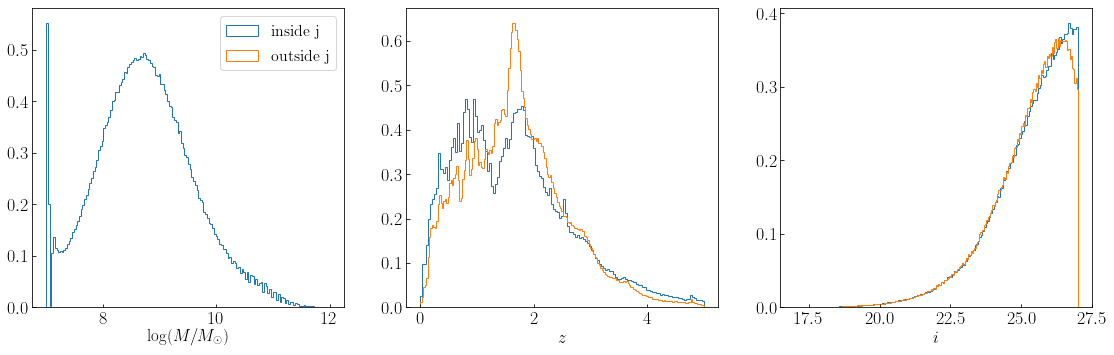

In [10]:
# inside_j vs. outside_j for v10 catalog
cat_v10_gal_z = cat_v10_gal[cat_v10_gal['Z_ML']<10]
cat_v10_inside_j = cat_v10_gal_z[cat_v10_gal_z['inside_j']==True]
cat_v10_outside_j = cat_v10_gal_z[cat_v10_gal_z['inside_j']==False]

fig, axs = plt.subplots(1, 3, figsize=(19,5.5))

# panel1 : mass distribution comparison
axs[0].hist(cat_v10_inside_j['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='inside j')
axs[0].hist(cat_v10_outside_j['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='outside j')
axs[0].legend(fontsize=16)
axs[0].set_xlabel('$\log(M/M_\odot)$',fontsize=17)

# panel2 : z distribution comparison
axs[1].hist(cat_v10_inside_j['ZPHOT'],bins='scott',range=(0,5),histtype='step',density=True,label='inside j')
axs[1].hist(cat_v10_outside_j['ZPHOT'],bins='scott',range=(0,5),histtype='step',density=True,label='outside j')
axs[1].set_xlabel('$z$',fontsize=17)

# panel3 : 
axs[2].hist(cat_v10_inside_j['i'],bins='scott',range=(17,27),histtype='step',density=True,label='inside j')
axs[2].hist(cat_v10_outside_j['i'],bins='scott',range=(17,27),histtype='step',density=True,label='outside j')
axs[2].set_xlabel('$i$',fontsize=17)

plt.show()

###  catalog comparison with COSMOS2015 / COSMOS2020
vincent's v9 (6band_v3 in COSMOS_uddd)

match v9 with cosmos2015/2020

1. compare mass and redshift

In [5]:
# match v9 with cosmos2015/2020
cat_v_name = 'clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits'
cat=Table.read(cat_v_name)

#2015
# cosmos_name = 'COSMOS2015_Laigle+_v1.1.fits'
# combined_cat_name = 'COSMOS2015_Laigle_Vincent_added.fits'

#2020
cosmos_name = '/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8.out.fits'
combined_cat_name = 'COSMOS2020_Laigle_Vincent_added.fits'

# matching
if '2015' in cosmos_name:
    cmd = 'java -jar stilts.jar tmatch2 in1='+cat_v_name + \
                ' in2='+cosmos_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name
else:
    cmd = 'java -jar stilts.jar tmatch2 in1='+cat_v_name + \
                ' in2='+cosmos_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="alpha delta" out='+combined_cat_name
os.system(cmd)
print(cmd)

# keep useful parameters
cat=Table.read(combined_cat_name)

if '2015' in cosmos_name:
    useful_params = ['ID_1','RA','DEC','Z_BEST','ZPHOT','Z_ML','ZPDF','MAG_ABS_NUV','MAG_ABS_r','MAG_ABS_Ks',
                     'MASS_MED_1','MASS_MED_2','SSFR_MED_1','g','r','i','z','inside_u','inside_uS','OBJ_TYPE']
    cat = cat[useful_params]
    cat.rename_column('ID_1','ID')
    cat.rename_column('SSFR_MED_1','SSFR_MED')
    cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
    cat.rename_column('MASS_MED_2','MASS_MED_COSMOS')  # mass from COSMOS2015
    cat.write(combined_cat_name, overwrite=True)
else:
    useful_params = ['ID_1','RA','DEC','Z_BEST','ZPHOT','Z_ML','zPDF','MAG_ABS_NUV','MAG_ABS_r','MAG_ABS_Ks',
                     'MASS_MED_1','mass_med_2','SSFR_MED_1','sfProb_nuvrk','sfProb_nuvrz','sfq_nuvrk','sfq_nuvrz','g','r','i','z','inside_u','inside_uS','OBJ_TYPE']
    cat = cat[useful_params]
    cat.rename_column('ID_1','ID')
    cat.rename_column('SSFR_MED_1','SSFR_MED')
    cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
    cat.rename_column('mass_med_2','MASS_MED_COSMOS')  # mass from COSMOS2020
    cat.rename_column('zPDF','ZPDF')  
    cat.write(combined_cat_name, overwrite=True)    

java -jar stilts.jar tmatch2 in1=clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits in2=/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8.out.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="alpha delta" out=COSMOS2020_Laigle_Vincent_added.fits


### plot comparison results


In [92]:
# _1 from COSMOS2020 CLASS==1 is sf, 0 is q
# _2 from CLAUDS/HSC COSMOS_uddd

# choose whcih catalog to plot
# cat_full_name = 'COSMOS2020_Laigle_Vincent_uddd_added_sfq_added.fits' # cosmos2020 (v1.8) and v3
# cat_full_name = 'COSMOS2020_Laigle_Vincent_v10_added_inside_j.fits'
# cat_full_name = 'COSMOS2020_Laigle_Vincent_v10_added_6B.fits'
cat_full_name = 'COSMOS2020_Laigle_Vincent_v11_added_6B_sfq_added.fits'
# cat_full_name = 'COSMOS2020_Laigle_Vincent_v9_added_sfq_added.fits'

# read in catalog
cat_lv_added_2020 = Table.read(cat_full_name)
# cat_lv_added_2020 = cat_lv_added_2020[cat_lv_added_2020['inside_j']==False]

# COSMOS2020 selection
cat_lv_added_2020 = cat_lv_added_2020[cat_lv_added_2020['MU']>-99]
cat_lv_added_2020 = cat_lv_added_2020[cat_lv_added_2020['MR']>-99]
cat_lv_added_2020 = cat_lv_added_2020[cat_lv_added_2020['MZ']>-99]
cat_lv_added_2020 = cat_lv_added_2020[cat_lv_added_2020['MK']>-99]
cat_lv_added_2020 = cat_lv_added_2020[cat_lv_added_2020['MNUV']>-99]
cat_lv_added_2020 = cat_lv_added_2020[cat_lv_added_2020['ZPDF']>=0]
cat_lv_added_2020 = cat_lv_added_2020[cat_lv_added_2020['mask']==0]  # unmasked
cat_lv_gal_2020 = cat_lv_added_2020[cat_lv_added_2020['type']==0]  # galaxy
cat = cat_lv_gal_2020.copy()

# magnitude cut
i_limit = 26
cat_lv_gal_2020 = cat_lv_gal_2020[cat_lv_gal_2020['i']<i_limit]

Text(0, 0.5, '$\\Delta z$')

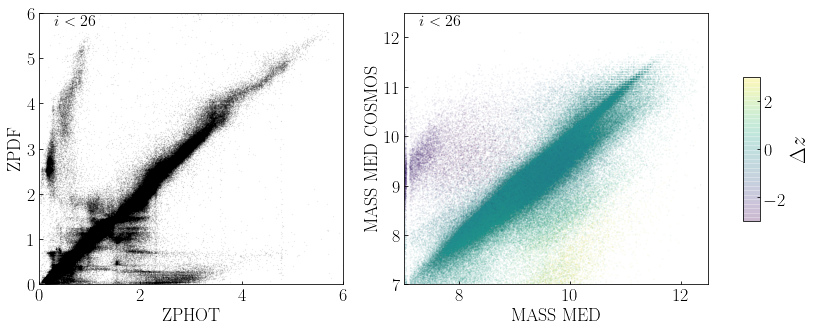

In [97]:
# z/mass comparison
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# z
try:
    axs[0].scatter(cat_lv_gal_2020['Z_ML'],cat_lv_gal_2020['ZPDF'],s=0.1,color='k',alpha=0.1)
except KeyError:
    axs[0].scatter(cat_lv_gal_2020['Z_BEST'],cat_lv_gal_2020['ZPDF'],s=0.1,color='k',alpha=0.1)
    
axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('ZPHOT',fontsize=18)
axs[0].set_ylabel('ZPDF',fontsize=18)

# mass
try:
    im = axs[1].scatter(cat_lv_gal_2020['MASS_MED'],cat_lv_gal_2020['MASS_MED_COSMOS'],s=0.1,c=cat_lv_gal_2020['Z_ML']-cat_lv_gal_2020['ZPDF'],alpha=0.1,vmin=-3,vmax=3)
except KeyError:
    im = axs[1].scatter(cat_lv_gal_2020['MASS_MED'],cat_lv_gal_2020['MASS_MED_COSMOS'],s=0.1,c=cat_lv_gal_2020['Z_BEST']-cat_lv_gal_2020['ZPDF'],alpha=0.1,vmin=-3,vmax=3)
axs[1].set_xlim([7,12.5])
axs[1].set_ylim([7,12.5])
axs[1].set_xlabel('MASS MED',fontsize=18)
axs[1].set_ylabel('MASS MED COSMOS',fontsize=18)

for i in range(2):
    axs[i].annotate(r'$i<'+str(i_limit)+'$',xy=([0.05,0.95]),xycoords='axes fraction',fontsize=16)
    
cb_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel(r'$\Delta z$',fontsize=22)

COSMOS2020_Laigle_Vincent_v11_added_6B_sfq_added.fits


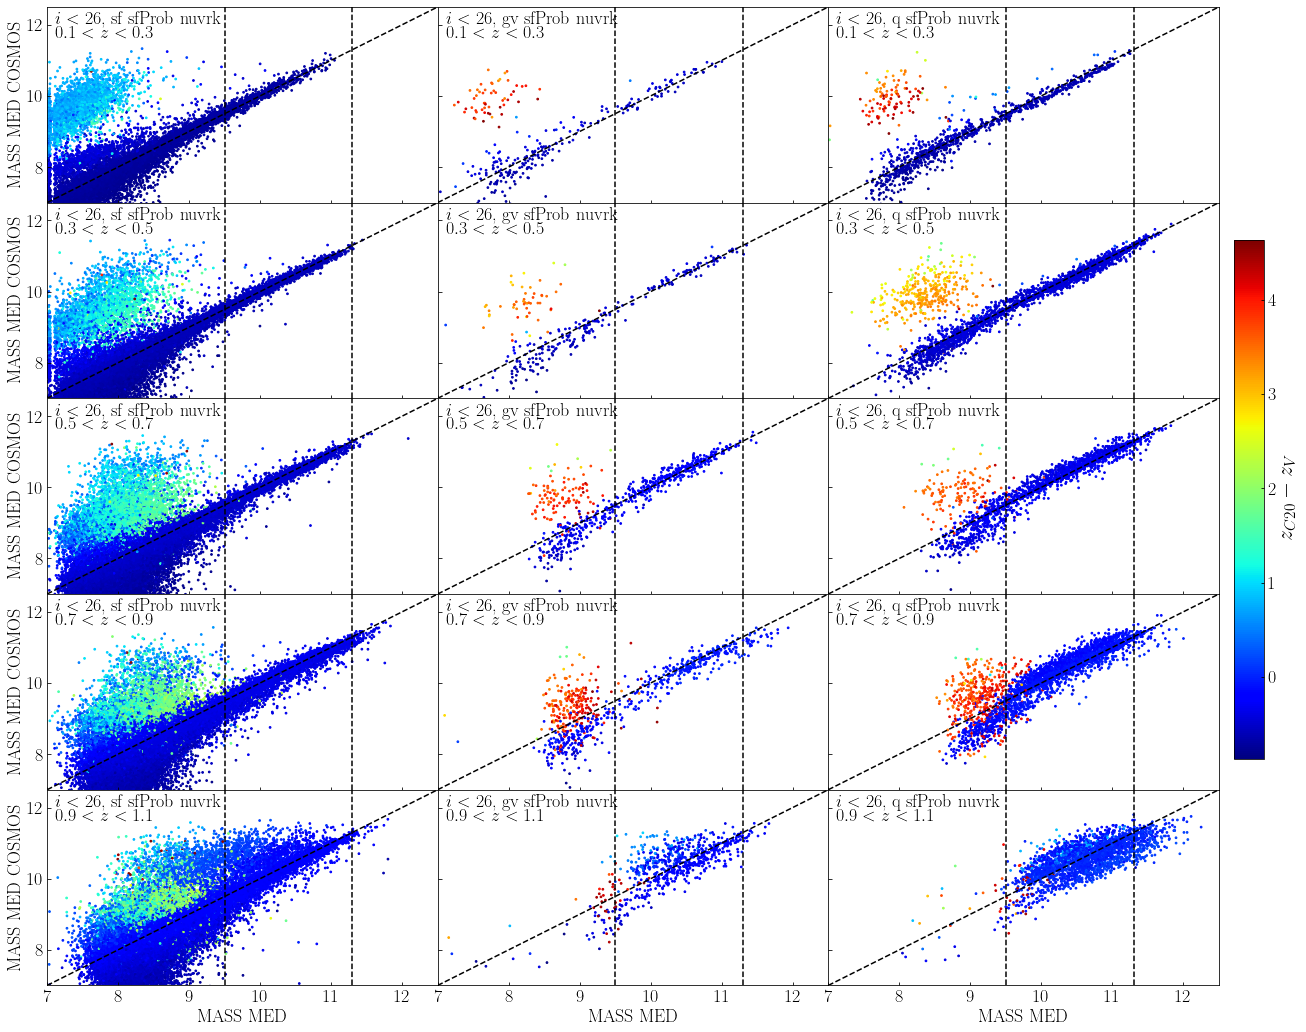

In [79]:
# mass (ours) vs mass (cosmos2020) plot 

fig, axs = plt.subplots(5, 3, figsize=(21,18),sharex=True, sharey=True)
sfq_method = 'sfProb_nuvrk'
gv_width_in_sfProb = 0.2  # should be larger than 0.02 (in sfq_[], gv_upper=0.51, gv_lower=0.49)
massive_gal_cut = 11.3   # mass cut for massive gals
show_inset = False
print(cat_full_name)

for j,sfq in enumerate(['sf','gv','q']):
    for i,z in enumerate([0.2, 0.4, 0.6, 0.8, 1.0]):
        try:
            cat_z = cat[cat['Z_ML']>z-0.1]
            cat_z = cat_z[cat_z['Z_ML']<z+0.1]
        except KeyError:
            cat_z = cat[cat['Z_BEST']>z-0.1]
            cat_z = cat_z[cat_z['Z_BEST']<z+0.1]
        
        if sfq_method != 'SSFR_MED':
            if sfq == 'sf':
                cat_z = cat_z[cat_z[sfq_method]>0.50+gv_width_in_sfProb/2]
            elif sfq == 'gv':
                cat_z = cat_z[abs(cat_z[sfq_method]-0.5)<=gv_width_in_sfProb/2]
            else:
                cat_z = cat_z[cat_z[sfq_method]<0.5-gv_width_in_sfProb/2]
        else:
            # SSFR_MED
            if sfq == 'sf':
                cat_z = cat_z[cat_z[sfq_method]>-10.9]
            elif sfq == 'gv':
                cat_z = cat_z[abs(cat_z[sfq_method]+11.0)<=0.1]
            else:
                cat_z = cat_z[cat_z[sfq_method]<-11.1]
            
        im = axs[i][j].scatter(cat_z['MASS_MED'], cat_z['MASS_MED_COSMOS'],s=3,c=cat_z['ZPDF']-cat_z['Z_BEST'],cmap='jet')
        axs[i][j].set_xlim([7,12.5])
        axs[i][j].set_ylim([7,12.5])
        axs[i][j].annotate(r'$i<'+str(i_limit)+'$, '+sfq+' '+sfq_method.replace('_',' '),xy=([0.02,0.91]),xycoords='axes fraction',fontsize=18)
        axs[i][j].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=18)
        axs[i][j].plot([7,12.5],[7,12.5],'--k')
        axs[i][0].set_ylabel('MASS MED COSMOS',fontsize=18)
        axs[4][j].set_xlabel('MASS MED',fontsize=18)
        
        # inset plot (mass offest distribution)
        if show_inset:
            ax_insert = axs[i][j].inset_axes([0.6, 0.12, 0.35, 0.25])
            cat_massive = cat_z[cat_z['MASS_MED']>massive_gal_cut]
            cat_not_massive = cat_z[cat_z['MASS_MED']<massive_gal_cut]
            cat_not_massive = cat_not_massive[cat_not_massive['MASS_MED']>9.5]
            
            axs[i][j].annotate(r'$\log M_{C20} - \log M_{V}$',xy=([0.6,0.4]),xycoords='axes fraction',fontsize=18)
            ax_insert.hist(cat_massive['MASS_MED_COSMOS']-cat_massive['MASS_MED'],range=(-2.5,2.5),bins='scott',histtype='step',color='orange',density=True)
            ax_insert.hist(cat_not_massive['MASS_MED_COSMOS']-cat_not_massive['MASS_MED'],range=(-2.5,2.5),bins='scott',histtype='step',color='green',density=True)
            
            # show offset
#             ax_insert.annotate(round(np.median(cat_massive['MASS_MED_COSMOS']-cat_massive['MASS_MED']),2),xy=([0.02,0.8]),xycoords='axes fraction',fontsize=15,color='orange')
#             ax_insert.annotate(round(np.median(cat_not_massive['MASS_MED_COSMOS']-cat_not_massive ['MASS_MED']),2),xy=([0.02,0.6]),xycoords='axes fraction',fontsize=15,color='green')
        
            # show scatter
            ax_insert.annotate(round(np.std(cat_massive['MASS_MED_COSMOS']-cat_massive['MASS_MED']),2),xy=([0.02,0.8]),xycoords='axes fraction',fontsize=15,color='orange')
            ax_insert.annotate(round(np.std(cat_not_massive['MASS_MED_COSMOS']-cat_not_massive ['MASS_MED']),2),xy=([0.02,0.6]),xycoords='axes fraction',fontsize=15,color='green')
        
        # vertical lines
        axs[i][j].vlines(x=massive_gal_cut,ymin=7,ymax=13,linestyles='dashed')
        axs[i][j].vlines(x=9.5,ymin=7,ymax=13,linestyles='dashed')

cb_ax = fig.add_axes([0.91, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel(r'$z_{C20}-z_V$',fontsize=22)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.savefig('/Users/lejay/Desktop/compare_cosmos2020_v11_b.png',dpi=150)


mass outlier stats & plot

0.2 sf 0
0.2 gv 0
0.2 q 0
0.4 sf 3
0.4 gv 2
0.4 q 64
0.6 sf 17
0.6 gv 4
0.6 q 64
0.8 sf 83
0.8 gv 34
0.8 q 72
1.0 sf 32
1.0 gv 14
1.0 q 258


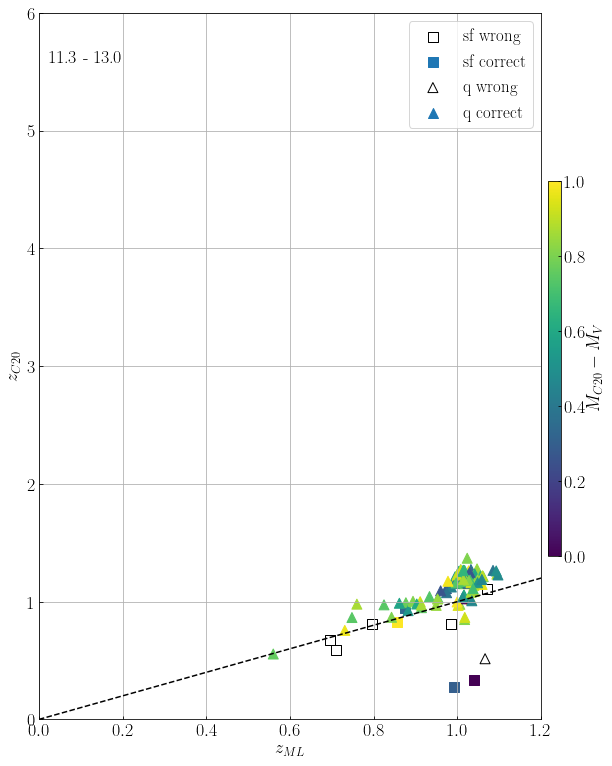

In [93]:
factor = 3 # mass ratio limit to be considered mass outlier 

masscut_low = 11.3
masscut_high = 13.0
sfq_method='sfProb_nuvrk'
gv_width_in_sfProb = 0.2  # should be larger than 0.02 (in sfq_[], gv_upper=0.51, gv_lower=0.49)
cat_outlier_stack = 0

fig, ax= plt.subplots(1, 1, figsize=(9,13),sharex=True, sharey=True)
outlier_results = [] # 3*5 table
for i,z in enumerate([0.2, 0.4, 0.6, 0.8, 1.0]):
    outlier_result_z = []
    for j,sfq in enumerate(['sf','gv','q']):
        try:
            cat_z = cat[cat['Z_ML']>z-0.1]
            cat_z = cat_z[cat_z['Z_ML']<z+0.1]
        except KeyError:
            cat_z = cat[cat['Z_BEST']>z-0.1]
            cat_z = cat_z[cat_z['Z_BEST']<z+0.1]
        
        if sfq_method != 'SSFR_MED':
            if sfq == 'sf':
                cat_z = cat_z[cat_z[sfq_method]>0.50+gv_width_in_sfProb/2]
            elif sfq == 'gv':
                cat_z = cat_z[abs(cat_z[sfq_method]-0.5)<=gv_width_in_sfProb/2]
            else:
                cat_z = cat_z[cat_z[sfq_method]<0.5-gv_width_in_sfProb/2]
        else:
            # SSFR_MED
            if sfq == 'sf':
                cat_z = cat_z[cat_z[sfq_method]>-11.2]
            elif sfq == 'gv':
                cat_z = cat_z[abs(cat_z[sfq_method]+11.0)<=0.1]
            else:
                cat_z = cat_z[cat_z[sfq_method]<-11.2]
        
        # mass cut
        cat_z = cat_z[cat_z['MASS_MED']>masscut_low]
        cat_z = cat_z[cat_z['MASS_MED']<masscut_high]
        print(z,sfq, len(cat_z))
        
        # clipping out some faint galaxies
#         cat_z = cat_z[cat_z['r']<np.median(cat_z['r'])+1]
#         cat_z = cat_z[cat_z['i']<np.median(cat_z['i'])+1]
#         cat_z = cat_z[cat_z['z']<np.median(cat_z['z'])+1]
#         print(z, sfq,len(cat_z))

        # calculate outlier fraction / stack outlier catalogs
        if len(cat_z)>0:
            cat_z_outlier = cat_z[abs(cat_z['MASS_MED']-cat_z['MASS_MED_COSMOS'])>np.log10(factor)]
            outlier_frac = len(cat_z_outlier)/len(cat_z)
            if cat_outlier_stack ==0:
                cat_outlier_stack = cat_z_outlier
            else:
                cat_outlier_stack = vstack([cat_outlier_stack, cat_z_outlier], metadata_conflicts='silent')
        else:
            outlier_frac = 1
        outlier_result_z.append(outlier_frac)
    outlier_results.append(outlier_result_z)

# plot
for sfq in ['sf','gv','q']:
    if sfq == 'sf':
        cat_outlier_stack_sfq = cat_outlier_stack[cat_outlier_stack[sfq_method]>0.50+gv_width_in_sfProb/2]
        cat_z_outlier_wrong_sfq = cat_outlier_stack_sfq[cat_outlier_stack_sfq['CLASS']==0]
        cat_z_outlier_correct_sfq = cat_outlier_stack_sfq[cat_outlier_stack_sfq['CLASS']==1]
        marker = 's'
    elif sfq == 'gv':
        cat_outlier_stack_sfq = cat_outlier_stack[abs(cat_outlier_stack[sfq_method]-0.5)<=gv_width_in_sfProb/2]
        continue
    else:
        cat_outlier_stack_sfq = cat_outlier_stack[cat_outlier_stack[sfq_method]<0.5-gv_width_in_sfProb/2]
        cat_z_outlier_wrong_sfq = cat_outlier_stack_sfq[cat_outlier_stack_sfq['CLASS']==1]
        cat_z_outlier_correct_sfq = cat_outlier_stack_sfq[cat_outlier_stack_sfq['CLASS']==0]  
        marker='^'
    
    colors_wrong_sfq = np.array(cat_z_outlier_wrong_sfq['MASS_MED_COSMOS'] - cat_z_outlier_wrong_sfq['MASS_MED'])
    colors_correct_sfq = np.array(cat_z_outlier_correct_sfq['MASS_MED_COSMOS'] - cat_z_outlier_correct_sfq['MASS_MED'])
    
    try:
        im = plt.scatter(cat_z_outlier_wrong_sfq['Z_ML'],cat_z_outlier_wrong_sfq['ZPDF'],marker=marker,s=100,label=sfq+' wrong',facecolors='none',edgecolors='k')
        plt.scatter(cat_z_outlier_correct_sfq['Z_ML'],cat_z_outlier_correct_sfq['ZPDF'],marker=marker,s=100,label=sfq+' correct',c=colors_correct_sfq)
    except:
        im = plt.scatter(cat_z_outlier_wrong_sfq['Z_BEST'],cat_z_outlier_wrong_sfq['ZPDF'],marker=marker,s=100,label=sfq+' wrong',facecolors='none',edgecolors='k')
        plt.scatter(cat_z_outlier_correct_sfq['Z_BEST'],cat_z_outlier_correct_sfq['ZPDF'],marker=marker,s=100,label=sfq+' correct',c=colors_correct_sfq)
        
cb_ax = fig.add_axes([0.91, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel(r'$M_{C20}-M_V$',fontsize=18)
ax.plot([0,1.2],[0,1.2],'--k')
ax.set_xlim([0,1.2])
ax.set_ylim([0,6])
ax.set_xlabel('$z_{ML}$',fontsize=18)
ax.set_ylabel('$z_{C20}$',fontsize=18)
ax.legend(fontsize=17)
ax.annotate(str(masscut_low)+' - '+str(masscut_high),xy=([0.02,0.93]),xycoords='axes fraction',fontsize=18)
ax.grid()

# save outlier fraction results
outlier_results = np.array(outlier_results)
np.save('mass_outlier_'+str(masscut_low)+'_'+str(masscut_high),outlier_results)
cat_outlier_stack.write('mass_outliers.fits',overwrite=True)

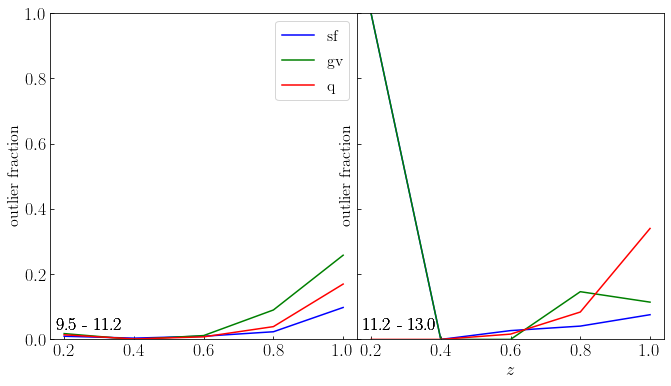

In [84]:
# plot the trend of mass outlier
z_list = [0.2, 0.4, 0.6, 0.8, 1.0]
sfq_list = ['sf','gv','q']
colors=['b','g','r']
fig, axs = plt.subplots(1, 2, figsize=(11,6),sharex=True, sharey=True)

# panel 1
masscut_low = 9.5
masscut_high = 11.2
outlier_results = np.load('mass_outlier_'+str(masscut_low)+'_'+str(masscut_high)+'.npy')
for sfq_index in range(3):
    axs[0].plot(z_list,outlier_results[:,sfq_index],label=sfq_list[sfq_index],color=colors[sfq_index])
    axs[0].annotate(str(masscut_low)+' - '+str(masscut_high),xy=([0.02,0.03]),xycoords='axes fraction',fontsize=18)

# panel 2
masscut_low = 11.2
masscut_high = 13.0
outlier_results = np.load('mass_outlier_'+str(masscut_low)+'_'+str(masscut_high)+'.npy')
for sfq_index in range(3):
    axs[1].plot(z_list, outlier_results[:,sfq_index],label=sfq_list[sfq_index],color=colors[sfq_index])
    axs[1].annotate(str(masscut_low)+' - '+str(masscut_high),xy=([0.02,0.03]),xycoords='axes fraction',fontsize=18)

axs[1].set_xlabel('$z$',fontsize=18)
axs[0].set_ylabel('outlier fraction',fontsize=16)
axs[1].set_ylabel('outlier fraction',fontsize=16)
axs[0].set_ylim([0,1])
axs[0].legend(fontsize=16)

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.show()

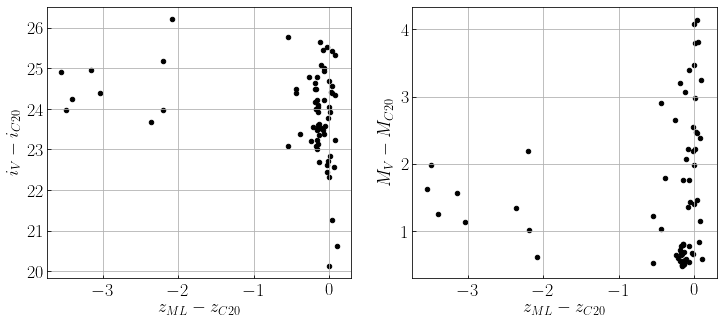

In [226]:
# mass, i-mag and redshift(z) difference for outliers
fig, axs = plt.subplots(1, 2, figsize=(12,5))
cat_outlier_phot = Table.read('mass_outliers_photometry.fits')

# delta_i vs. delta_z
axs[0].scatter(cat_outlier_phot['Z_ML']-cat_outlier_phot['ZPDF'],cat_outlier_phot['r_c20'] ,s=20,color='k')
axs[0].set_xlabel('$z_{ML} - z_{C20}$',fontsize=18)
axs[0].set_ylabel('$i_V - i_{C20}$',fontsize=18)
axs[0].grid()

# delta_M vs. delta_z
axs[1].scatter(cat_outlier_phot['Z_ML']-cat_outlier_phot['ZPDF'],cat_outlier_phot['MASS_MED']-cat_outlier_phot['MASS_MED_COSMOS'] ,s=20,color='k')
axs[1].set_xlabel('$z_{ML} - z_{C20}$',fontsize=18)
axs[1].set_ylabel('$M_V - M_{C20}$',fontsize=18)
axs[1].grid()


#### misclassified galaxies ($0.1<z<1.1$)

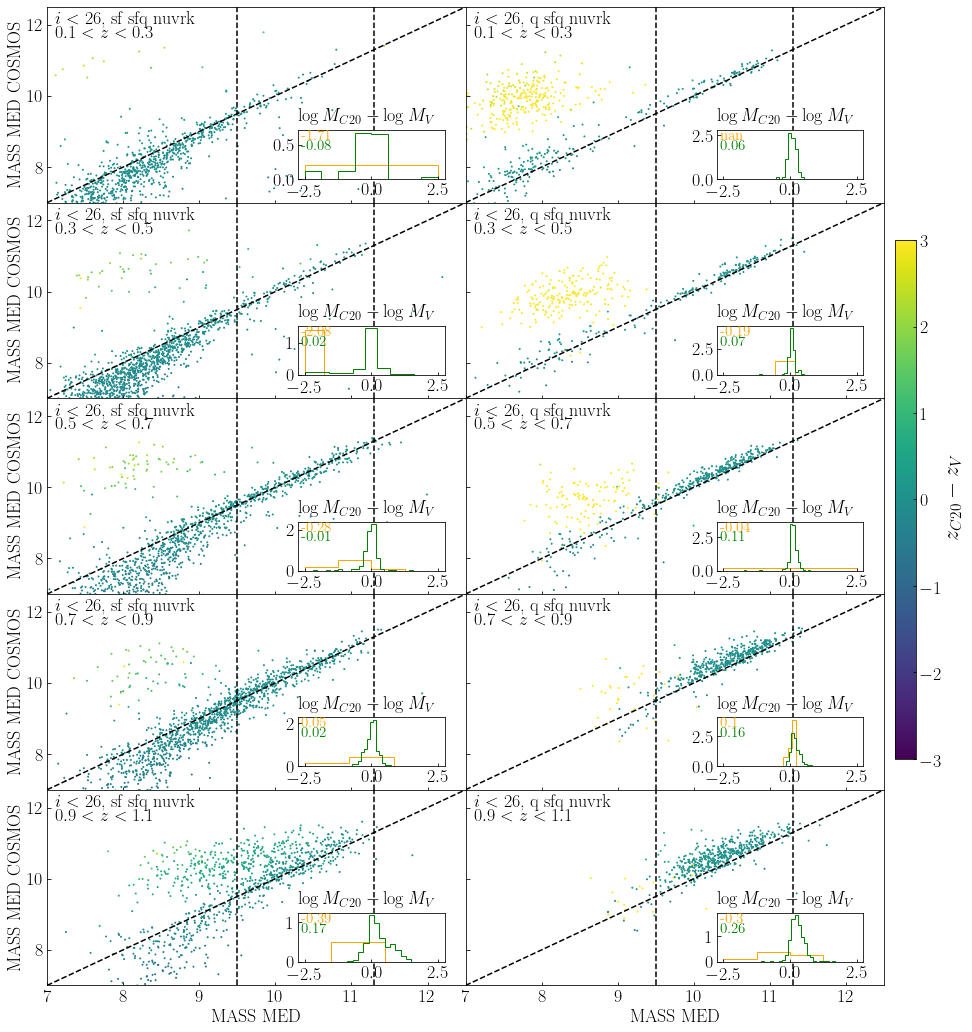

In [64]:
fig, axs = plt.subplots(5, 2, figsize=(15,18),sharex=True, sharey=True)
sfq_method = 'sfq_nuvrk'
i_limit = 26
massive_gal_cut = 11.3   # mass cut for massive gals

for j,sfq in enumerate(['sf','q']):
    for i,z in enumerate([0.2, 0.4, 0.6, 0.8, 1.0]):
        cat_z = cat[cat['Z_ML']>z-0.1]
        cat_z = cat_z[cat_z['Z_ML']<z+0.1]
        
        if sfq == 'sf':
            cat_z = cat_z[cat_z[sfq_method]>0.50] #vicent-sf
            cat_z = cat_z[cat_z['CLASS']==0] # cosmos2020-q
        else:
            cat_z = cat_z[cat_z[sfq_method]<0.50] #vicent-q
            cat_z = cat_z[cat_z['CLASS']==1]# cosmos2020-sf

        im = axs[i][j].scatter(cat_z['MASS_MED'], cat_z['MASS_MED_COSMOS'],s=1,c=cat_z['ZPDF']-cat_z['Z_ML'],alpha=1,vmin=-3,vmax=3)
        axs[i][j].set_xlim([7,12.5])
        axs[i][j].set_ylim([7,12.5])
        axs[i][j].annotate(r'$i<'+str(i_limit)+'$, '+sfq+' '+sfq_method.replace('_',' '),xy=([0.02,0.91]),xycoords='axes fraction',fontsize=18)
        axs[i][j].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=18)
        axs[i][j].plot([7,12.5],[7,12.5],'--k')
        axs[i][0].set_ylabel('MASS MED COSMOS',fontsize=18)
        axs[4][j].set_xlabel('MASS MED',fontsize=18)
        
        # inset plot (mass offest distribution)
        ax_insert = axs[i][j].inset_axes([0.6, 0.12, 0.35, 0.25])
        cat_massive = cat_z[cat_z['MASS_MED']>massive_gal_cut]
        cat_not_massive = cat_z[cat_z['MASS_MED']<massive_gal_cut]
        cat_not_massive = cat_not_massive[cat_not_massive['MASS_MED']>9.5]
        
        axs[i][j].annotate(r'$\log M_{C20} - \log M_{V}$',xy=([0.6,0.4]),xycoords='axes fraction',fontsize=18)
        ax_insert.hist(cat_massive['MASS_MED_COSMOS']-cat_massive['MASS_MED'],range=(-2.5,2.5),bins='scott',histtype='step',color='orange',density=True)
        ax_insert.hist(cat_not_massive['MASS_MED_COSMOS']-cat_not_massive['MASS_MED'],range=(-2.5,2.5),bins='scott',histtype='step',color='green',density=True)
        ax_insert.annotate(round(np.median(cat_massive['MASS_MED_COSMOS']-cat_massive['MASS_MED']),2),xy=([0.02,0.8]),xycoords='axes fraction',fontsize=15,color='orange')
        ax_insert.annotate(round(np.median(cat_not_massive['MASS_MED_COSMOS']-cat_not_massive ['MASS_MED']),2),xy=([0.02,0.6]),xycoords='axes fraction',fontsize=15,color='green')
        
        # vertical lines
        axs[i][j].vlines(x=11.3,ymin=7,ymax=13,linestyles='dashed')
        axs[i][j].vlines(x=9.5,ymin=7,ymax=13,linestyles='dashed')

cb_ax = fig.add_axes([0.91, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel(r'$z_{C20}-z_V$',fontsize=22)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.savefig('/Users/lejay/Desktop/compare_cosmos2020.png',dpi=150)

#### mass comparison with inside j galaxies (v10)

In [196]:
# _1 from COSMOS2020
# _2 from CLAUDS/HSC COSMOS_uddd
cat_lv_added_2020_inside_j= Table.read('COSMOS2020_Laigle_Vincent_v10_added_inside_j_sfq_added.fits') 

cat_lv_added_2020_inside_j = cat_lv_added_2020_inside_j[cat_lv_added_2020_inside_j['MU']>-99]
cat_lv_added_2020_inside_j = cat_lv_added_2020_inside_j[cat_lv_added_2020_inside_j['MR']>-99]
cat_lv_added_2020_inside_j = cat_lv_added_2020_inside_j[cat_lv_added_2020_inside_j['MZ']>-99]
cat_lv_added_2020_inside_j = cat_lv_added_2020_inside_j[cat_lv_added_2020_inside_j['MK']>-99]
cat_lv_added_2020_inside_j = cat_lv_added_2020_inside_j[cat_lv_added_2020_inside_j['MNUV']>-99]

# COSMOS2020 selection
cat_lv_added_2020_inside_j = cat_lv_added_2020_inside_j[cat_lv_added_2020_inside_j['mask']==0]  # unmasked
cat_lv_gal_2020_inside_j = cat_lv_added_2020_inside_j[cat_lv_added_2020_inside_j['type']==0]  # galaxy
cat_inside_j = cat_lv_gal_2020_inside_j.copy()

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


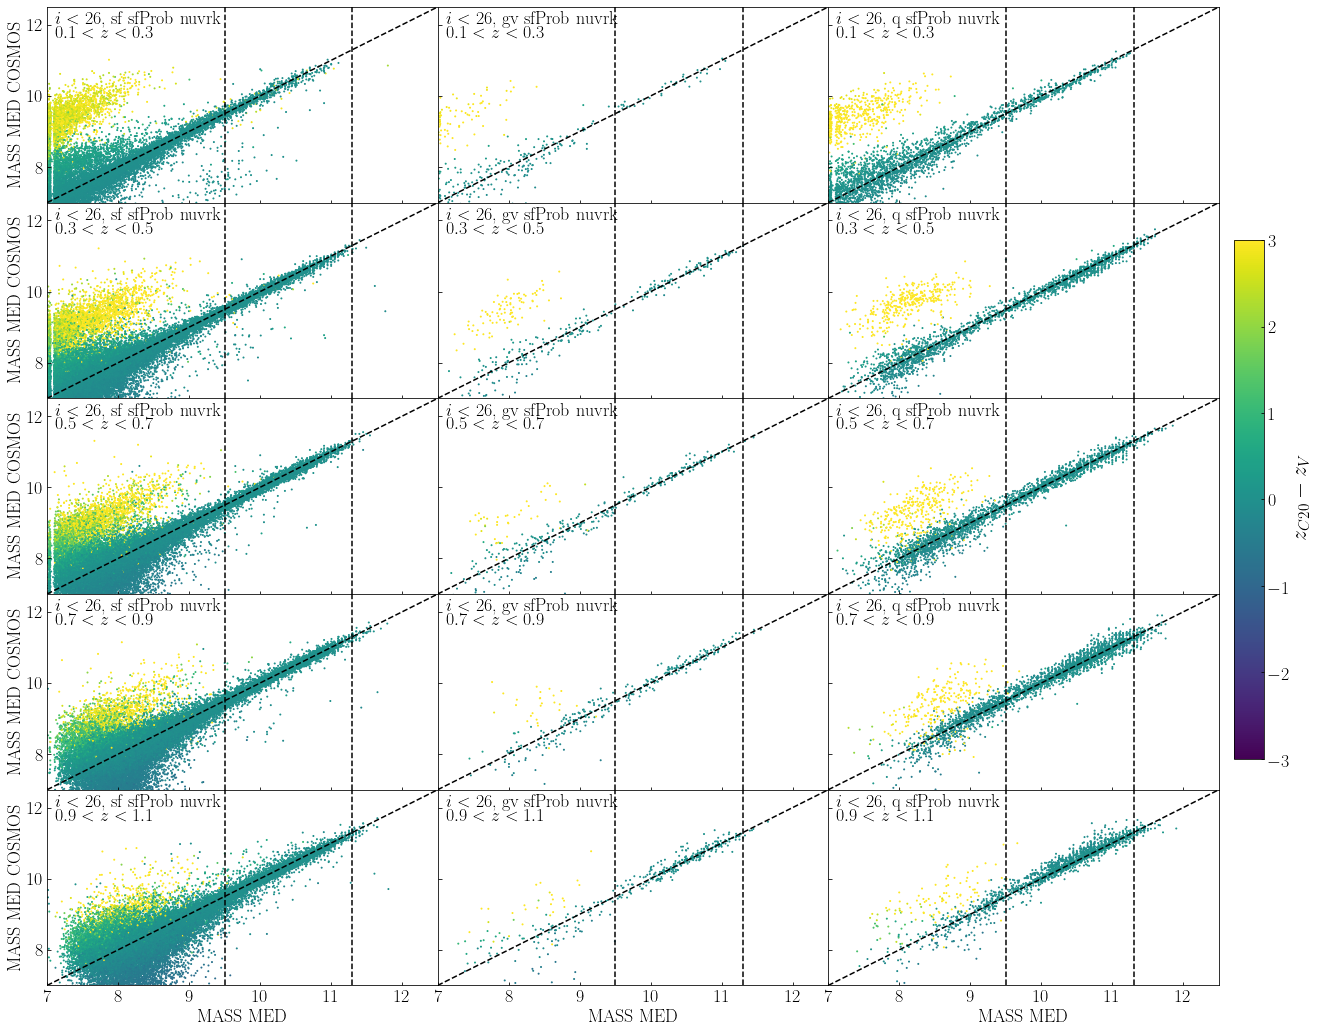

In [198]:
fig, axs = plt.subplots(5, 3, figsize=(21,18),sharex=True, sharey=True)
sfq_method = 'sfProb_nuvrk'
i_limit = 26
gv_width_in_sfProb = 0.2  # should be larger than 0.02 (in sfq_[], gv_upper=0.51, gv_lower=0.49)
massive_gal_cut = 11.3   # mass cut for massive gals

for j,sfq in enumerate(['sf','gv','q']):
    for i,z in enumerate([0.2, 0.4, 0.6, 0.8, 1.0]):
        cat_z = cat_inside_j[cat_inside_j['Z_ML']>z-0.1]
        cat_z = cat_z[cat_z['Z_ML']<z+0.1]
        if sfq == 'sf':
            cat_z = cat_z[cat_z[sfq_method]>0.50+gv_width_in_sfProb/2]
        elif sfq == 'gv':
            cat_z = cat_z[abs(cat_z[sfq_method]-0.5)<=gv_width_in_sfProb/2]
        else:
            cat_z = cat_z[cat_z[sfq_method]<0.5-gv_width_in_sfProb/2]

        im = axs[i][j].scatter(cat_z['MASS_MED'], cat_z['MASS_MED_COSMOS'],s=1,c=cat_z['ZPDF']-cat_z['Z_ML'],alpha=1,vmin=-3,vmax=3)
        axs[i][j].set_xlim([7,12.5])
        axs[i][j].set_ylim([7,12.5])
        axs[i][j].annotate(r'$i<'+str(i_limit)+'$, '+sfq+' '+sfq_method.replace('_',' '),xy=([0.02,0.91]),xycoords='axes fraction',fontsize=18)
        axs[i][j].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=18)
        axs[i][j].plot([7,12.5],[7,12.5],'--k')
        axs[i][0].set_ylabel('MASS MED COSMOS',fontsize=18)
        axs[4][j].set_xlabel('MASS MED',fontsize=18)
        
        # inset plot (mass offest distribution)
#         ax_insert = axs[i][j].inset_axes([0.6, 0.12, 0.35, 0.25])
#         cat_massive = cat_z[cat_z['MASS_MED']>massive_gal_cut]
#         cat_not_massive = cat_z[cat_z['MASS_MED']<massive_gal_cut]
#         cat_not_massive = cat_not_massive[cat_not_massive['MASS_MED']>9.5]
        
#         axs[i][j].annotate(r'$\log M_{C20} - \log M_{V}$',xy=([0.6,0.4]),xycoords='axes fraction',fontsize=18)
#         ax_insert.hist(cat_massive['MASS_MED_COSMOS']-cat_massive['MASS_MED'],range=(-2.5,2.5),bins='scott',histtype='step',color='orange',density=True)
#         ax_insert.hist(cat_not_massive['MASS_MED_COSMOS']-cat_not_massive['MASS_MED'],range=(-2.5,2.5),bins='scott',histtype='step',color='green',density=True)
#         ax_insert.annotate(round(np.median(cat_massive['MASS_MED_COSMOS']-cat_massive['MASS_MED']),2),xy=([0.02,0.8]),xycoords='axes fraction',fontsize=15,color='orange')
#         ax_insert.annotate(round(np.median(cat_not_massive['MASS_MED_COSMOS']-cat_not_massive ['MASS_MED']),2),xy=([0.02,0.6]),xycoords='axes fraction',fontsize=15,color='green')
        
        # vertical lines
        axs[i][j].vlines(x=11.3,ymin=7,ymax=13,linestyles='dashed')
        axs[i][j].vlines(x=9.5,ymin=7,ymax=13,linestyles='dashed')

cb_ax = fig.add_axes([0.91, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel(r'$z_{C20}-z_V$',fontsize=22)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.savefig('/Users/lejay/Desktop/compare_cosmos2020.png',dpi=150)

### mass vs.  magnitude (at certain z)

1. the catalog: v6 catalog matched with COSMOS2015
2. separates sf/q (sSFR or SVM classification)
3. 0.1 $\Delta z$ bins

1.809000000000001
1.5754999999999981
1.5399999999999991
2.056000000000001
2.4154999999999944
2.6630000000000003


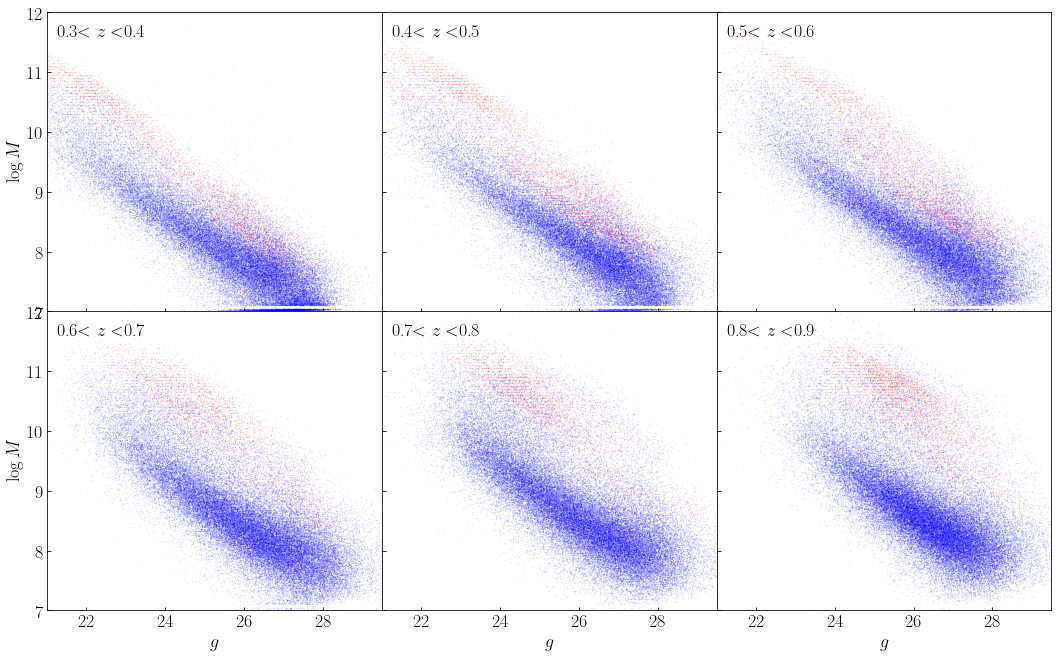

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(18,11),sharey=True, sharex=True)
cat_type = 'cat_v'

# load the catalog
if cat_type == 'cat_a':
    cat = Table.read('COSMOS2015_Laigle_Anneya_added.fits')
    cat = cat[cat['preds_median']<0.89]  # select gals
    z_keyname = 'zKDEPeak'
elif cat_type == 'cat_t':
    cat = Table.read('COSMOS2015_Laigle_Thibaud_added.fits')
    cat = cat[cat['CLASS']==0]  # select gals
    z_keyname = 'Z_BEST_BC03'
else:
    cat = Table.read('COSMOS2020_Laigle_Vincent_added.fits')
    cat = cat[cat['OBJ_TYPE']==0]  # select gals
    z_keyname = 'Z_ML'
# cat = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v6_gal_cut_params.fits')

for i,z in enumerate([0.35,0.45,0.55,0.65,0.75,0.85]):
    cat_z = cat[abs(cat[z_keyname]-z)<0.05]  # redshift selection
    
    # sf/q separation
    cat_z_sf = cat_z[cat_z['SSFR_MED']>-11]
    cat_z_q = cat_z[cat_z['SSFR_MED']<-11]
    
    # plot 
    row = i // 3
    col = i % 3
    axs[row][col].scatter(cat_z_sf['g'],cat_z_sf['MASS_MED'],s=0.05,c='b',alpha=0.2)
    axs[row][col].scatter(cat_z_q['g'],cat_z_q['MASS_MED'],s=0.05,c='r',alpha=0.2)

#     im = axs[row][col].scatter(cat_z['g'],cat_z['MASS_MED'],s=0.1,c=cat_z[z_keyname]-cat_z['ZPDF'],alpha=0.2,vmin=-3,vmax=3)
    axs[row][col].annotate(str(round(z-0.05,2))+"$<z<$"+str(round(z+0.05,2)),xy=([0.03,0.92]),
                    xycoords='axes fraction',fontsize=18)
    
    # find out delta_median_g between sf/q
    cat_z_sf_9 = cat_z_sf[np.logical_and(cat_z_sf['MASS_MED']>8.9, cat_z_sf['MASS_MED']<9.1)]
    cat_z_q_9 = cat_z_q[np.logical_and(cat_z_q['MASS_MED']>8.9, cat_z_q['MASS_MED']<9.1)]
    print(np.median(cat_z_q_9['g']) - np.median(cat_z_sf_9['g']))
    
# lables and xy_limits
axs[1][0].set_xlabel(r'$g$',fontsize=18)
axs[1][1].set_xlabel(r'$g$',fontsize=18)
axs[1][2].set_xlabel(r'$g$',fontsize=18)
axs[0][0].set_ylabel(r'$\log M$',fontsize=18)
axs[1][0].set_ylabel(r'$\log M$',fontsize=18)
axs[0][0].set_xlim([21,29.5])
axs[0][0].set_ylim([7,12])
fig.subplots_adjust(hspace=0) 
fig.subplots_adjust(wspace=0)
# cb_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])
# cbar = fig.colorbar(im, cax=cb_ax)
# cbar.ax.set_ylabel(r'$z_v - z_c$',fontsize=22)
plt.show()

### add sf/q separation for COSMOS2020 / trim the catalog to useful parameters

$NUV-r>3(r-J)+1$

$NUV-r>3.1$

In [61]:
#COSMOS2020 catalogs
cosmos_2020 = Table.read('/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8.out.fits')
cosmos_2020_phot = Table.read('/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted.fits')

# useful columns
cosmos_2020 = cosmos_2020['Id','alpha','delta','zBEST','zPDF','mask','type','mass_med','SFR_med','sSFR_med',
                          'MNUV','MU','MR','MZ','MJ','MK']

sfq = []
for gal in cosmos_2020:
    if gal['MNUV']<99.  and gal['MR']<99. and gal['MJ']<99.:
        if (gal['MNUV'] - gal['MR'])>3*(gal['MR']-gal['MJ'])+1 and gal['MNUV'] - gal['MR']>3.1:
            sfq.append(0.)
        else:
            sfq.append(1.)
    else:
        sfq.append(-1.)

# add column to both phisical catalog and photometric catalog
sfq_col = Column(name='CLASS',data=sfq)
cosmos_2020.add_column(sfq_col)
cosmos_2020.write('/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8_trim_SfqAdded.fits',overwrite=True)

cosmos_2020_phot.add_column(sfq_col)
cosmos_2020_phot.write('/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_sfAdded.fits',overwrite=True)

#### add photometric info

In [11]:
cat_cosmos_2020 = Table.read('/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8_trim_SfqAdded.fits')
cat_cosmos_2020_phot = Table.read('/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_trim_column_renamed.fits')

In [26]:
cat_cosmos_added = hstack([cat_cosmos_2020,cat_cosmos_2020_phot])
cat_cosmos_added.remove_columns(['ALPHA_J2000_cosmos','DELTA_J2000_cosmos','IRAC_CH1_MAG_cosmos','IRAC_CH2_MAG_cosmos','CLASS_cosmos'])
cat_cosmos_added.rename_column('HSC_i_MAG_AUTO_cosmos','i')
cat_cosmos_added.rename_column('HSC_r_MAG_AUTO_cosmos','r')
cat_cosmos_added.rename_column('HSC_z_MAG_AUTO_cosmos','z')
cat_cosmos_added.rename_column('alpha','ra')
cat_cosmos_added.rename_column('delta','dec')
cat_cosmos_added.write('/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8_trim_Sfq_phot_Added.fits',overwrite=True)

#### prepare random point catalog for COSMOS2020

mask region

In [8]:
cat_random_cosmos2020 = Table.read('CUT_deep_catalogs/random_point_cat/COSMOS2020_random_point.fits')
cat_cosmos2020 = Table.read('/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8_trim_SfqAdded.fits')
cat_cosmos2020 = cat_cosmos2020[cat_cosmos2020['mask']==0]

mask = []
for i in tqdm(range(len(cat_random_cosmos2020))):
    gal = cat_random_cosmos2020[i]
    cat_cosmos2020_cut = cat_cosmos2020[abs(cat_cosmos2020['alpha']-gal['ra'])<8/3600.]
    cat_cosmos2020_cut = cat_cosmos2020_cut[abs(cat_cosmos2020_cut['delta']-gal['dec'])<8/3600.]
    if len(cat_cosmos2020_cut)==0:
        mask.append(1)
    else:
        mask.append(0)

mask = np.array(mask)
mask_col = Column(data=mask,name='mask')
cat_random_cosmos2020.add_column(mask_col)


100%|██████████| 400000/400000 [41:03<00:00, 162.37it/s] 


In [9]:
cat_random_cosmos2020.write('CUT_deep_catalogs/random_point_cat/COSMOS2020_random_point_maskadded.fits',overwrite=True)

### Compare EAZY and LePhare for COSMOS2020

In [28]:
# load catalogs
cat_lephare_name = '/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8.out.fits'
cat_eazy_name = '/Volumes/LejaySSD/COSMOS2020/classic_v1.5.full.zout.fits'
combined_cosmos_name = 'cosmos2020_eazy_lephare_added.fits'

# match the two catalogs
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_lephare_name + \
                ' in2='+cat_eazy_name+' find=best join=1and2 matcher=sky params=1.0 values1="alpha delta"' + \
                ' values2="ra dec" out='+combined_cosmos_name

os.system(cmd)
print(cmd)

# keep useful parameters
cat=Table.read(combined_cosmos_name)
useful_params = ['ra','dec','mass_med','mass',]
cat = cat[useful_params]
cat.write(combined_cosmos_name, overwrite=True)


java -jar stilts.jar tmatch2 in1=/Volumes/LejaySSD/COSMOS2020/photoz_cosmos2020_lephare_classic_v1.8.out.fits in2=/Volumes/LejaySSD/COSMOS2020/classic_v1.5.full.zout.fits find=best join=1and2 matcher=sky params=1.0 values1="alpha delta" values2="ra dec" out=cosmos2020_eazy_lephare_added.fits


/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


(7, 12)

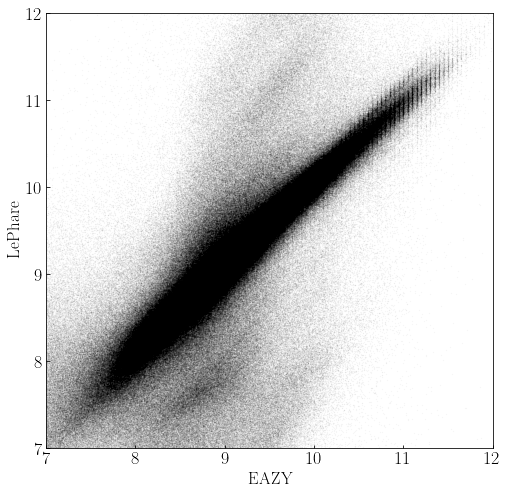

In [39]:
# plot
fig = plt.figure(figsize=(8,8))
cat_added = cat_added[cat_added['mass']>0]
cat_added = Table.read('cosmos2020_eazy_lephare_added.fits')

cat_added_sf = cat_added[cat_added['']]
cat_added_q = 
plt.scatter(cat_added['mass_med'],np.log10(cat_added['mass']),c='k',s=0.02,alpha=0.1)
plt.xlabel('EAZY',fontsize=17)
plt.ylabel('LePhare',fontsize=17)
plt.xlim([7,12])
plt.ylim([7,12])

### V9 catalog
the "PASSIVE" parameter

In [63]:
cat_v9 = Table.read('/Volumes/LejaySSD/v9_cats/COSMOS_v9_v210217.fits')
cat_v9 = cat_v9['ID','RA','DEC','STAR_FORMING']
cat_v9.write('/Volumes/LejaySSD/v9_cats/COSMOS_v9_sfq_param_only.fits')

In [67]:
# match with v8 sfq_added

cat_v9_trim_name = '/Volumes/LejaySSD/v9_cats/COSMOS_v9_sfq_param_only.fits'
cat_v8_name = 'clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v8_gal_cut_params_sfq_added.fits'
combined_cat_name = 'COSMOS_deep_v8and9_sfq_added.fits'
# matching
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_v9_trim_name + \
                ' in2='+cat_v8_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="RA DEC" out='+combined_cat_name
print(cmd)
os.system(cmd)

java -jar stilts.jar tmatch2 in1=/Volumes/LejaySSD/v9_cats/COSMOS_v9_sfq_param_only.fits in2=clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v8_gal_cut_params_sfq_added.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="RA DEC" out=COSMOS_deep_v8and9_sfq_added.fits


0

(-0.1, 1.1)

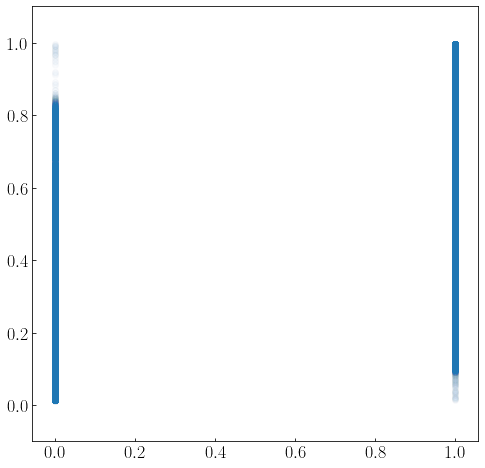

In [73]:
cat_v9_sfq_added = Table.read('COSMOS_deep_v8and9_sfq_added.fits')

# plot
fig = plt.figure(figsize=(8,8))

plt.scatter(cat_v9_sfq_added['STAR_FORMING'],cat_v9_sfq_added['sfProb_nuvrk'],alpha=0.01)
plt.xlabel('',fontsize=17)
plt.ylabel('',fontsize=17)
plt.ylim([-0.1,1.1])

### Compare different fields (Cosmic Variance)

The sfq_added catalogs:
1. unmasked (MASK==0)
2. galaxies only (OBJ_TYPE==0)
3. inside_uS==True or inside_u==True

In [104]:
cat_cosmos = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v8_gal_cut_params_sfq_added.fits')
cat_elais = Table.read('clauds_cat_v2020/completeness_useful_params_cat/ELAIS_deep_v8_gal_cut_params_sfq_added.fits')
cat_xmm = Table.read('clauds_cat_v2020/completeness_useful_params_cat/XMM-LSS_deep_v8_gal_cut_params_sfq_added.fits')
cat_deep = Table.read('clauds_cat_v2020/completeness_useful_params_cat/DEEP_deep_v8_gal_cut_params_sfq_added.fits')
cat_list = [cat_cosmos,cat_elais,cat_xmm,cat_deep]
cat_name_list = ['COSMOS','ELAIS','XMM-LSS','DEEP']
print('COSMOS:',len(cat_cosmos))
print('ELAIS:',len(cat_elais))
print('XMM-LSS:',len(cat_xmm))
print('DEEP:',len(cat_deep))

COSMOS: 2727465
ELAIS: 1945613
XMM-LSS: 3518348
DEEP: 1653693


In [154]:
for i,cat in enumerate(cat_list):
    print('')
    print(cat_name_list[i])
    for z in [0.2, 0.4, 0.6, 0.8]:
        print('======================')
        cat_z = cat[abs(cat['ZPHOT']-z)<0.1]
        
        sfq_type = 'sfProb_nuvrk'
        print('before sfq cut',len(cat_z))
        cat_z = cat_z[cat_z[sfq_type] >= 0]
        cat_z = cat_z[cat_z[sfq_type] <= 1]
        print('after sfq cut',len(cat_z))
        
        # sf/q statistics in each field
        cat_z_sf = cat_z[cat_z[sfq_type]>0.5]
        cat_z_q =  cat_z[cat_z[sfq_type]<0.5]
        print(z, cat_name_list[i],'sf',len(cat_z_sf),'q',len(cat_z_q))
    
        # number of massive galaxies in each field
        cat_z_massive = cat_z[cat_z['MASS_MED']>11.3]
        print(z, cat_name_list[i],'massive',len(cat_z_massive))


COSMOS
before sfq cut 95043
after sfq cut 0
0.2 COSMOS sf 0 q 0
0.2 COSMOS massive 0
before sfq cut 143603
after sfq cut 143457
0.4 COSMOS sf 129672 q 13666
0.4 COSMOS massive 294
before sfq cut 170981
after sfq cut 170758
0.6 COSMOS sf 158446 q 12193
0.6 COSMOS massive 336
before sfq cut 186303
after sfq cut 186216
0.8 COSMOS sf 169288 q 16827
0.8 COSMOS massive 877

ELAIS
before sfq cut 95887
after sfq cut 0
0.2 ELAIS sf 0 q 0
0.2 ELAIS massive 0
before sfq cut 64465
after sfq cut 64411
0.4 ELAIS sf 53480 q 10883
0.4 ELAIS massive 269
before sfq cut 119876
after sfq cut 119761
0.6 ELAIS sf 108066 q 11630
0.6 ELAIS massive 200
before sfq cut 126751
after sfq cut 126701
0.8 ELAIS sf 111700 q 14918
0.8 ELAIS massive 785

XMM-LSS
before sfq cut 133938
after sfq cut 0
0.2 XMM-LSS sf 0 q 0
0.2 XMM-LSS massive 0
before sfq cut 173459
after sfq cut 173315
0.4 XMM-LSS sf 159207 q 13990
0.4 XMM-LSS massive 249
before sfq cut 209325
after sfq cut 209083
0.6 XMM-LSS sf 197956 q 11041
0.6 XMM-LS

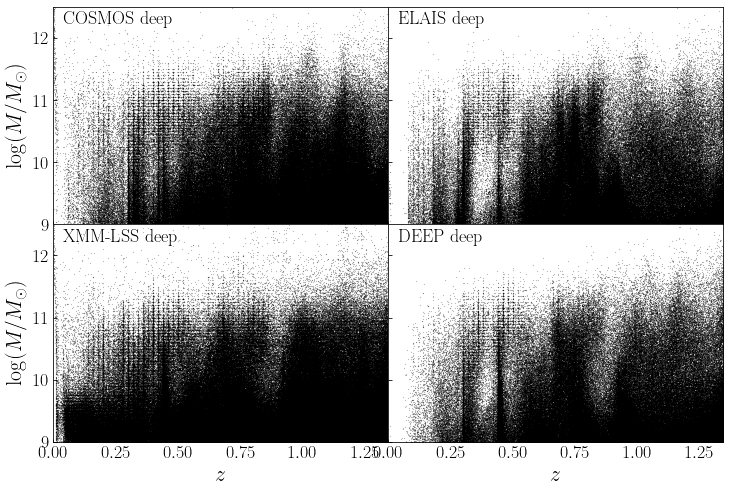

In [127]:
# mass vs z plot
fig, axs = plt.subplots(2, 2, figsize = (12, 8), sharex=True, sharey=True)
for i,cat in enumerate(cat_list):
    row=i//2
    col=i%2
    cat = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name_list[i]+'_deep_v8_gal_cut_params_sfq_added.fits')
    axs[row][col].scatter(cat['Z_ML'],cat['MASS_MED'],s=0.01,color='k')

    axs[1][col].set_xlabel(r'$z$',fontsize=22)
    axs[row][0].set_ylabel(r'$\log(M/M_\odot)$',fontsize=22)
    axs[1][col].set_xlim([0,1.34])
    axs[row][0].set_ylim([9,12.5])
    
    # annotations
    axs[row][col].annotate(cat_name_list[i]+' deep',xy=([0.03,0.92]),xycoords='axes fraction',fontsize=18)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

### high-z object number density test

In [63]:
import astropy.units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8), sharex=True, sharey=True)
for i,cat in enumerate(cat_list):
    row=i//2
    col=i%2
    
    # read in catalog / random catalog
    cat_random = Table.read()
    cat_random = cat_random[cat_random['mask']==0]
    cat = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name_list[i]+'_deep_v8_gal_cut_params_sfq_added.fits')
    cat = cat[cat['ZPHOT']>2]

    # count highz objs (random position)
    highz_count = []
    for i in range(100):
        id_rand = int(random() * len(cat_random))
        ra_rand = cat_random[id_rand]['RA']
        dec_rand = cat_random[id_rand]['DEC']
        coord_rand = SkyCoord(ra_rand * u.deg, dec_rand * u.deg)
        cat_neighbors_rand = cat[abs(cat['RA'] - ra_rand) < 0.01]
        cat_neighbors_rand = cat[abs(cat['DEC'] - ra_rand) < 0.01]
        coord_neighbors_rand = SkyCoord(np.array(cat_neighbors_rand['RA']) * u.deg, np.array(cat_neighbors_rand['DEC']) * u.deg)
        cat_neighbors_rand = cat_neighbors_rand[coord_neighbors_rand.separation(coord_rand).degree < 0.001]
        highz_count.append(len(cat_neighbors_rand))
    
    xs[row][col].hist(highz_count,histtype='step',color='k')
    axs[1][col].set_xlabel(r'$z$',fontsize=22)
    axs[row][0].set_ylabel(r'$\log(M/M_\odot)$',fontsize=22)
    
    axs[1][col].set_xlim([0,1.34])
    
    # annotations
    axs[row][col].annotate(cat_name_list[i]+' deep',xy=([0.03,0.92]),xycoords='axes fraction',fontsize=18)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

In [94]:
cat = Table.read('clauds_cat_v2020/completeness_useful_params_cat/ELAIS_deep_v8_gal_cut_params_sfq_added.fits')
cat = cat[abs(cat['ZPHOT']-0.4)<0.1]
cat = cat[cat['MASS_MED']>11.3]
cat = cat[cat['sfProb_nuvrz']>=0]
cat = cat[cat['sfProb_nuvrz']<=1]
len(cat)

281

In [98]:
print(len(cat[cat['sfq_nuvrz']<0.5]))
print(len(cat[cat['sfq_nuvrz']>=0.5]))

272
9


#### COSMOS2020 density 

#### random point catalog from venice 
process RA DEC columns

In [3]:
for cat_name in ['COSMOS_deep','DEEP_deep','XMM-LSS_deep','ELAIS_deep']:
    cat_random_name = './CUT_deep_catalogs/random_point_cat/'+cat_name+'_random_point.fits'
    cat_random = Table.read(cat_random_name)
    
    # rename columns
    cat_random.rename_column('ra','RA')
    cat_random.rename_column('dec','DEC')
    cat_random.write(cat_random_name, overwrite=True)

KeyError: 'Column ra does not exist'

### check photoz uncertainty
Quadri & Williams 2010

In [4]:
from scipy.optimize import curve_fit
def _1gaussian(x, amp1,cen1,sigma1,c):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))+c

as a function of magnitude

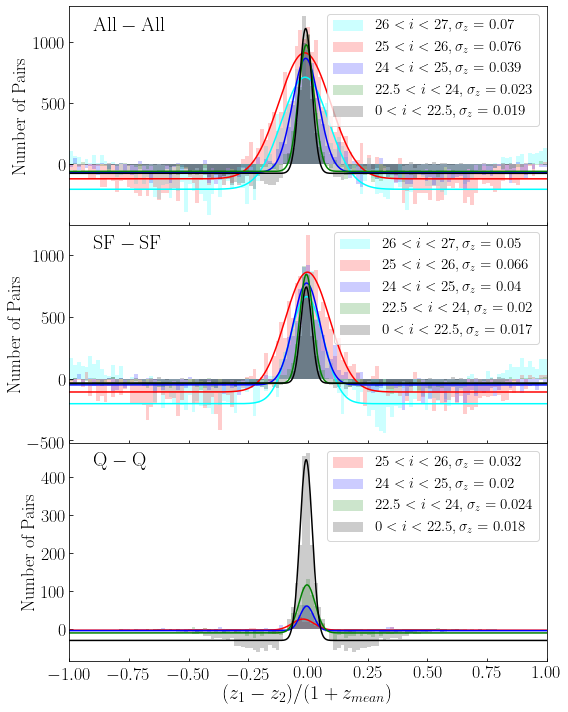

In [3]:
bin_number = 250
edges = np.linspace(-2,2,bin_number+1)
fig, axs = plt.subplots(3, 1, figsize = (8, 10), sharex=True)
mag_list = [0,22.5,24,25,26,27]
c_list = ['cyan','r','b','g','k']
for k,pair_sfq in enumerate(['','_sf-sf','_q-q']):
    for i in np.arange(1,len(mag_list)):
        ns = np.zeros(bin_number)
        fail=False
        for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep']:
            try:
                ns += np.load('CUT_deep_catalogs/radial_dist_code/delta_z/catalog_0.0_7.0_mag_'+str(mag_list[len(mag_list)-i-1])+'_'+str(mag_list[len(mag_list)-i])+pair_sfq+'_'+cat_name+'_deltaz_physical.npy')
            except FileNotFoundError:
                fail=True
        
        #plot
        if not fail:
            popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[93:157], ns[93:157], p0=[1200,0,0.05,0])
            perr_gauss = np.sqrt(np.diag(pcov_gauss))
            axs[k].bar(edges[:-1], ns,width=np.diff(edges), label=r'$'+str(mag_list[len(mag_list)-i-1])+'<i<'+str(mag_list[len(mag_list)-i])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',alpha=0.2,color=c_list[i-1])
            x_plot = np.linspace(-2,2,1500)
            axs[k].plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),ms=4,color=c_list[i-1])
            axs[k].legend(fontsize=15) 
        axs[k].set_xlim([-1,1])
        axs[k].set_ylabel('Number of Pairs',fontsize=18)
#         axs[k].grid()
        
    if pair_sfq == '':
        axs[k].annotate(r'$\mathrm{All-All}$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)
    else:
        axs[k].annotate(r'$\mathrm{'+pair_sfq.replace('_','').upper()+'}$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

plt.xlabel(r'$(z_1-z_2)/(1+z_{mean})$',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/catalog_photoz.png',dpi=200)
plt.show()

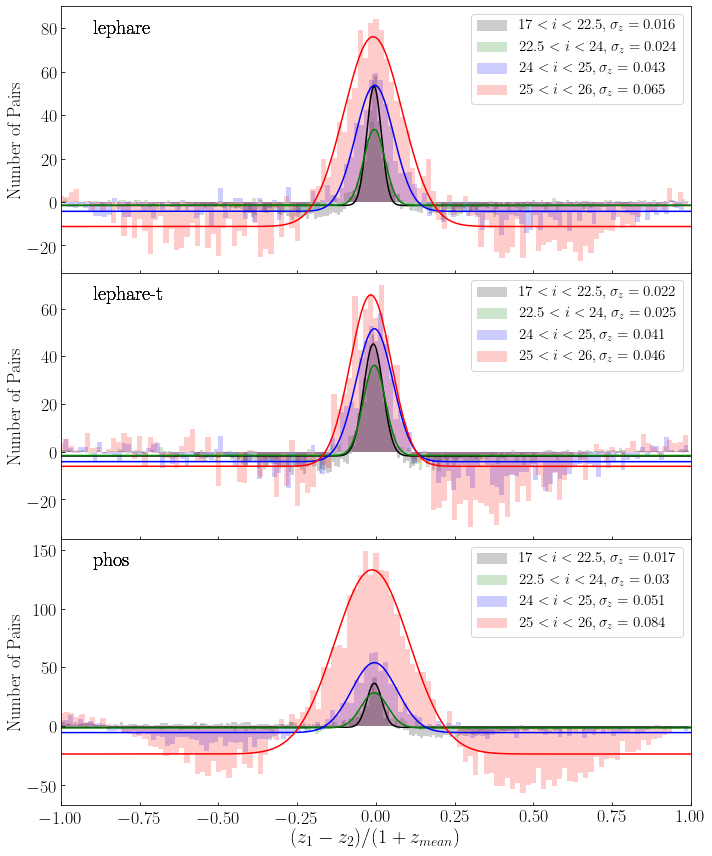

In [94]:
fig, axs = plt.subplots(3, 1, figsize = (10, 12), sharex=True)
mag_list = [17,22.5,24,25,26]
bin_number_list = [220,170,130,120]
c_list = ['k','g','b','r']
zkeyname_list = ['ZPHOT','Z_ML_T','ZPHOT_6B']

for k,cat_type in enumerate(['lephare','lephare-t','phos']):
    zkeyname = zkeyname_list[k]
    
    for i in np.arange(0,len(mag_list)-1):
        bin_number = bin_number_list[i]
        ns = np.zeros(bin_number)
        edges = np.linspace(-1,1,bin_number+1)
#         print(i,cat_type,mag_list[i],mag_list[i+1],fail,bin_number,zkeyname)
        
        fail=False
        for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep']:
            
            
            if cat_type == 'lephare-t':
                zkeyname='Z_ML_T'
            elif cat_type == 'lephare':
                zkeyname = 'ZPHOT'
            else:
                if cat_name not in ['COSMOS_deep','XMM-LSS_deep']:
                    zkeyname = 'ZPHOT'
            filename = 'CUT_deep_catalogs/radial_dist_code/delta_z/catalog_0.0_7.0_mag_'+str(mag_list[i])+'_'+str(mag_list[i+1])+'_'+\
                              cat_name+'_'+cat_type+'_'+zkeyname+'_deltaz_physical.npy'
            arr = np.load(filename)
            try:
                ns += arr
            except FileNotFoundError:
                fail=True
        
        #plot
        if not fail:
            popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[:-1], ns, p0=[1200,0,0.05,0])
            perr_gauss = np.sqrt(np.diag(pcov_gauss))
            axs[k].bar(edges[:-1], ns,width=np.diff(edges), label=r'$'+str(mag_list[i])+'<i<'+str(mag_list[i+1])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',alpha=0.2,color=c_list[i])
            x_plot = np.linspace(-2,2,1500)
            axs[k].plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),ms=4,color=c_list[i])
            axs[k].legend(fontsize=15) 
        axs[k].set_xlim([-1,1])
        axs[k].set_ylabel('Number of Pairs',fontsize=18)
        axs[k].annotate(cat_type.replace('_',' '),xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

plt.xlabel(r'$(z_1-z_2)/(1+z_{mean})$',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/catalog_photoz.png',dpi=200)
plt.show()

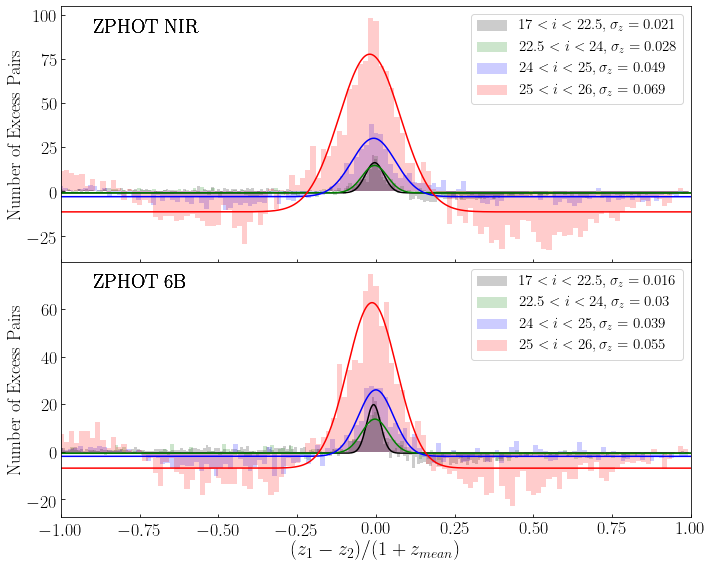

In [95]:
bin_number_list = [220,170,130,120]
fig, axs = plt.subplots(2, 1, figsize = (10, 8), sharex=True)
mag_list = [17,22.5,24,25,26]
c_list = ['k','g','b','r']
for k,zkeyname in enumerate(['_ZPHOT_NIR','_ZPHOT_6B']):
    for i in np.arange(0,len(mag_list)-1):
        bin_number = bin_number_list[i]
        edges = np.linspace(-1,1,bin_number+1)
        ns = np.zeros(bin_number)
        fail=False
        for cat_name in ['COSMOS_deep','XMM-LSS_deep']:
            arr = np.load('CUT_deep_catalogs/radial_dist_code/delta_z/catalog_0.0_7.0_mag_'+str(mag_list[i])+'_'+str(mag_list[i+1])+'_'+cat_name+'_phos'+zkeyname+'_deltaz_physical.npy')
            ns += arr
        
        #plot
        if not fail:
            popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[:-1], ns, p0=[1200,0,0.05,0])
            perr_gauss = np.sqrt(np.diag(pcov_gauss))
            axs[k].bar(edges[:-1], ns,width=np.diff(edges), label=r'$'+str(mag_list[i])+'<i<'+str(mag_list[i+1])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',alpha=0.2,color=c_list[i])
            
            x_plot = np.linspace(-1,1,1500)
            axs[k].plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),ms=4,color=c_list[i])
            axs[k].legend(fontsize=15) 
            
        axs[k].set_xlim([-1,1])
        axs[k].set_ylabel('Number of Excess Pairs',fontsize=18)
        axs[k].annotate(zkeyname[1:].replace('_',' '),xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

plt.xlabel(r'$(z_1-z_2)/(1+z_{mean})$',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/catalog_photoz.png',dpi=200)
plt.show()

four different fields

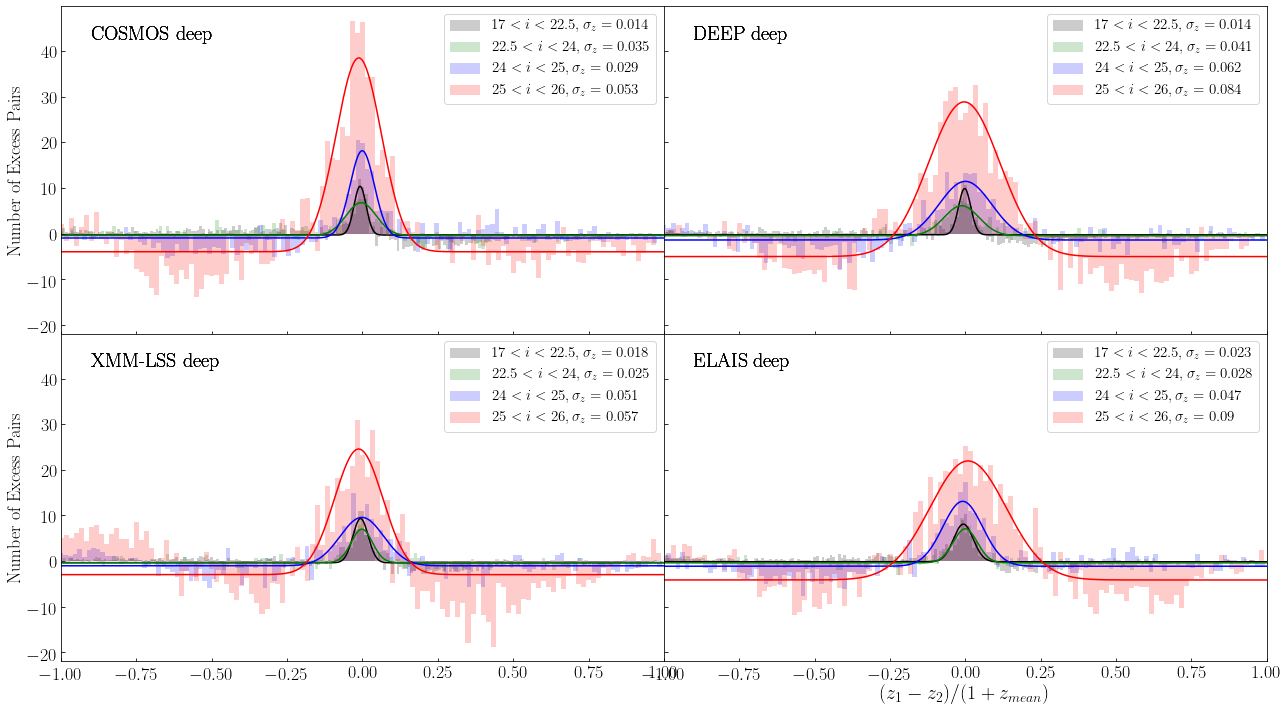

In [96]:
fig, axs = plt.subplots(2, 2, figsize = (18, 10), sharex=True, sharey=True)
mag_list = [17,22.5,24,25,26]
bin_number_list = [220,170,130,120]
c_list = ['k','g','b','r']

# cat_type = 'lephare-t'
# cat_type = 'lephare'
cat_type = 'phos'
for i,cat_name in enumerate(['COSMOS_deep','XMM-LSS_deep','DEEP_deep','ELAIS_deep']):
    row=i%2
    col=i//2
    
    if cat_type == 'lephare-t':
        zkeyname='Z_ML_T'
    elif cat_type == 'lephare':
        zkeyname = 'ZPHOT'
    else:
        if cat_name in ['COSMOS_deep','XMM-LSS_deep']:
            zkeyname= 'ZPHOT_6B'
        else:
            zkeyname = 'ZPHOT'
            
    for i in np.arange(0,len(mag_list)-1):
        fail=False
        bin_number = bin_number_list[i]
        edges = np.linspace(-1,1,bin_number+1)
        
        filename = 'CUT_deep_catalogs/radial_dist_code/delta_z/catalog_0.0_7.0_mag_'+str(mag_list[i])+'_'+str(mag_list[i+1])+'_'+cat_name+'_'+cat_type+'_'+zkeyname+'_deltaz_physical.npy'
        arr = np.load(filename)
        
        #plot
        if not fail:
            popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[:-1], arr, p0=[1200,0,0.05,0])
            perr_gauss = np.sqrt(np.diag(pcov_gauss))
            axs[row][col].bar(edges[:-1], arr,width=np.diff(edges), label=r'$'+str(mag_list[i])+'<i<'+str(mag_list[i+1])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',alpha=0.2,color=c_list[i])
            
            x_plot = np.linspace(-1,1,1000)
            axs[row][col].plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),ms=4,color=c_list[i])
            axs[row][col].legend(fontsize=15) 
            
        axs[row][col].set_xlim([-1,1])
        axs[row][0].set_ylabel('Number of Excess Pairs',fontsize=18)
        axs[row][col].annotate(cat_name.replace('_',' '),xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

plt.xlabel(r'$(z_1-z_2)/(1+z_{mean})$',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/catalog_photoz.png',dpi=200)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'CUT_deep_catalogs/radial_dist_code/delta_z/catalog_0.0_7.0_mag_17_22.5_COSMOS_deep_lephare-t_Z_ML_T_deltaz_close.npy'

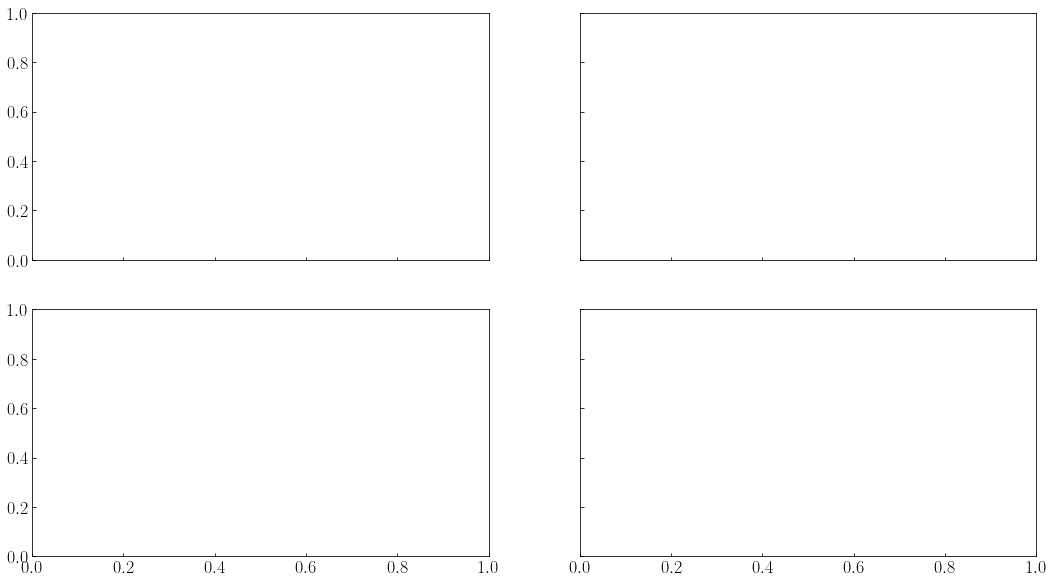

In [88]:
fig, axs = plt.subplots(2, 2, figsize = (18, 10), sharex=True, sharey=True)
mag_list = [17,22.5,24,25,26]
bin_number_list = [220,170,130,120]
c_list = ['k','g','b','r']
pair_type='close'
cat_type = 'lephare-t'
# cat_type = 'lephare'
# cat_type = 'phos'
for i,cat_name in enumerate(['COSMOS_deep','XMM-LSS_deep','DEEP_deep','ELAIS_deep']):
    row=i%2
    col=i//2
    
    if cat_type == 'lephare-t':
        zkeyname='Z_ML_T'
    elif cat_type == 'lephare':
        zkeyname = 'ZPHOT'
    else:
        if cat_name in ['COSMOS_deep','XMM-LSS_deep']:
            zkeyname= 'ZPHOT_6B'
        else:
            zkeyname = 'ZPHOT'
            
    for i in np.arange(0,len(mag_list)-1):
        fail=False
        bin_number = bin_number_list[i]
        edges = np.linspace(-1,1,bin_number+1)
        
        filename = 'CUT_deep_catalogs/radial_dist_code/delta_z/catalog_0.0_7.0_mag_'+str(mag_list[i])+'_'+str(mag_list[i+1])+'_'+cat_name+'_'+cat_type+'_'+zkeyname+'_deltaz_'+pair_type+'.npy'
        arr = np.load(filename)
        
        #plot
        if not fail:
            popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[:-1], arr, p0=[1200,0,0.05,0])
            perr_gauss = np.sqrt(np.diag(pcov_gauss))
            axs[row][col].bar(edges[:-1], arr,width=np.diff(edges), label=r'$'+str(mag_list[i])+'<i<'+str(mag_list[i+1])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',alpha=0.2,color=c_list[i])
            
            x_plot = np.linspace(-1,1,1000)
            axs[row][col].plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),ms=4,color=c_list[i])
            axs[row][col].legend(fontsize=15) 
            
        axs[row][col].set_xlim([-1,1])
        axs[row][0].set_ylabel('Number of Excess Pairs',fontsize=18)
        axs[row][col].annotate(cat_name.replace('_',' '),xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

plt.xlabel(r'$(z_1-z_2)/(1+z_{mean})$',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/catalog_photoz.png',dpi=200)
plt.show()

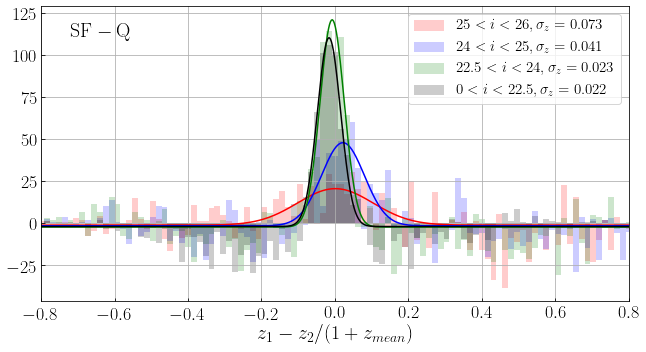

In [40]:
bin_number = 250
edges = np.linspace(-2,2,bin_number+1)
fig, axs = plt.subplots(1, 1, figsize = (9, 5), sharex=True)
mag_list = [0,22.5,24,25,26]
pair_sfq = '_sf-q'
c_list = ['r','b','g','k']
for i in range(len(mag_list)-1):
    ns = np.zeros(bin_number)
    for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep']:
        ns += np.load('CUT_deep_catalogs/radial_dist_code/delta_z/catalog_0.0_7.0_mag_'+str(mag_list[4-i-1])+'_'+str(mag_list[4-i])+pair_sfq+'_'+cat_name+'_deltaz_physical.npy')

    popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[:-1], ns, p0=[1200,0,0.05,0])
    perr_gauss = np.sqrt(np.diag(pcov_gauss))
    plt.bar(edges[:-1], ns,width=np.diff(edges), label=r'$'+str(mag_list[4-i-1])+'<i<'+str(mag_list[4-i])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',alpha=0.2,color=c_list[i])
    x_plot = np.linspace(-2,2,1500)

    plt.plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),ms=4,color=c_list[i])

plt.xlim([-0.8,0.8])
plt.legend(fontsize=15)
plt.annotate(r'$\mathrm{'+pair_sfq.replace('_','').upper()+'}$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)
plt.grid()
plt.xlabel(r'$z_1 - z_2/(1+z_{mean})$',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show()


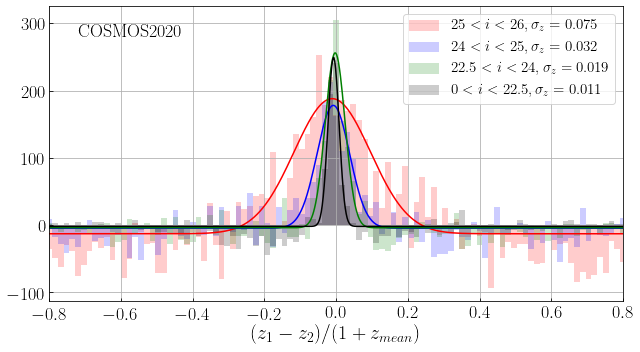

In [45]:
bin_number = 250
edges = np.linspace(-2,2,bin_number+1)
fig, axs = plt.subplots(1, 1, figsize = (9, 5), sharex=True)
mag_list = [0,22.5,24,25,26]
c_list = ['r','b','g','k']
for i in range(len(mag_list)-1):
    ns = np.zeros(bin_number)
    for cat_name in ['cosmos2020']:
        ns += np.load('CUT_deep_catalogs/radial_dist_code/delta_z/catalog_0.0_7.0_mag_'+str(mag_list[4-i-1])+'_'+str(mag_list[4-i])+'_'+cat_name+'_deltaz_physical.npy')

    popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[:-1], ns, p0=[1200,0,0.05,0])
    perr_gauss = np.sqrt(np.diag(pcov_gauss))
    plt.bar(edges[:-1], ns,width=np.diff(edges), label=r'$'+str(mag_list[4-i-1])+'<i<'+str(mag_list[4-i])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',alpha=0.2,color=c_list[i])
    x_plot = np.linspace(-2,2,1500)

    plt.plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),ms=4,color=c_list[i])

plt.xlim([-0.8,0.8])
plt.legend(fontsize=15)
plt.annotate('COSMOS2020',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=18)
plt.grid()
plt.xlabel(r'$(z_1 - z_2)/(1+z_{mean})$',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/catalog_photoz_cosmos2020.png',dpi=300)
plt.show()


as a function of redshift

[ 1.928e+02 -7.688e-03  4.700e-02 -4.821e+01]
[ 1.290e+02  1.130e-02  5.871e-02 -3.224e+01]
[ 2.027e+02  8.735e-03  9.551e-02 -5.067e+01]


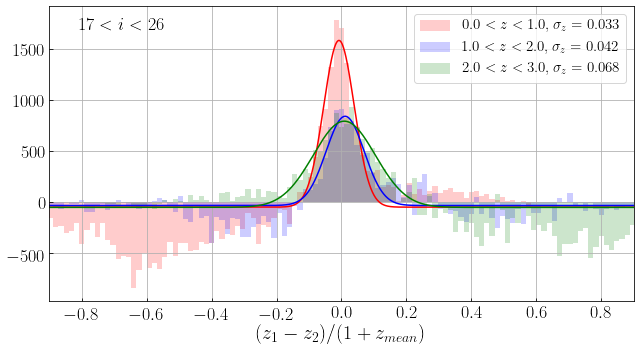

In [48]:
bin_number = 250
edges = np.linspace(-2,2,bin_number+1)
fig, axs = plt.subplots(1, 1, figsize = (9, 5), sharex=True, sharey=True)
z_list = [0.0,1.0,2.0,3.0]
c_list = ['r','b','g']

for i in range(len(z_list)-1):
    n1s = np.zeros(bin_number)
    for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep']:
        n1 = np.load('CUT_deep_catalogs/radial_dist_code/delta_z/catalog_'+str(z_list[i])+'_'+str(z_list[i+1])+'_z_17_26_'+cat_name+'_deltaz_physical.npy')
        n1s += n1
        
    popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[:-1], n1s, p0=[1200,0,0.05,0])
    perr_gauss = np.sqrt(np.diag(pcov_gauss))
    print(popt_gauss)
    plt.bar(edges[:-1], n1s,width=np.diff(edges), label=r'$'+str(z_list[i])+'<z<'+str(z_list[i+1])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',color=c_list[i],alpha=0.2)
    
    x_plot = np.linspace(-0.9,0.9,1500)
    plt.plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),'-',ms=4,color=c_list[i])
    

plt.annotate(r'$17<i<26$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.xlim([-0.9,0.9])
plt.grid()
plt.legend(fontsize=15)
plt.xlabel(r'$(z_1-z_2)/(1+z_{mean})$',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/catalog_photoz_z.png',dpi=300)
plt.show()

#### split both z and mag

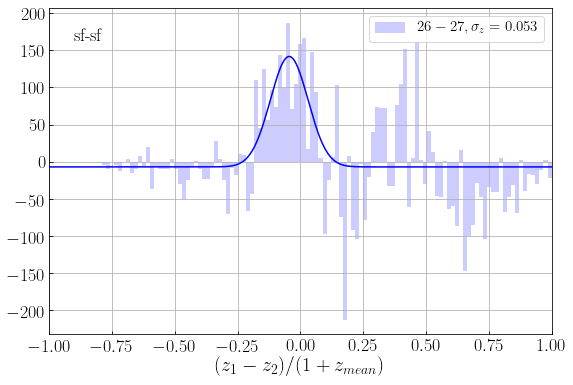

In [25]:
bin_number = 250
edges = np.linspace(-2,2,bin_number+1)
fig, axs = plt.subplots(1, 1, figsize = (9, 6), sharex=True)
mag_list = [17,22.5,24,25,26,27]
c_list = ['cyan','r','b','g','k']
pair_sfq = '_sf-sf'
z = 2.5
for i in range(1,len(mag_list)):
    
    # read in data
    fail=False
    ns = np.zeros(bin_number)
    for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep']:
        filename = 'CUT_deep_catalogs/radial_dist_code/delta_z/catalog_'+str(round(z-0.5,1))+'_'+str(round(z+0.5,1))+'_magz_'+str(mag_list[len(mag_list)-i-1])+'_'+str(mag_list[len(mag_list)-i])+pair_sfq+'_'+cat_name+'_deltaz_physical.npy'
        try:
            ns += np.load(filename)
        except FileNotFoundError:
            print(filename)
            fail = True
    
    # plot
    if not fail:
        popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges[:-1], ns, p0=[1200,0,0.05,0])
        perr_gauss = np.sqrt(np.diag(pcov_gauss))
        plt.bar(edges[:-1], ns,width=np.diff(edges), label=r'$'+str(mag_list[len(mag_list)-i-1])+'-'+str(mag_list[len(mag_list)-i])+', \sigma_z='+str(round(popt_gauss[2]/np.sqrt(2),3))+'$',alpha=0.2,color=c_list[i-1])
        x_plot = np.linspace(-2,2,1500)
        plt.plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),ms=4,color=c_list[i-1])
    else:
        plt.bar(edges[:-1], 0,width=np.diff(edges), label=r'$'+str(mag_list[len(mag_list)-i-1])+'-'+str(mag_list[len(mag_list)-i])+',\sigma_z=$N/A',alpha=0.2,color=c_list[i-1])
    
    plt.xlim([-1,1])
    plt.grid()
    plt.legend(fontsize=15)

plt.annotate(pair_sfq.replace('_',''),xy=([0.05,0.9]),xycoords='axes fraction',fontsize=18)

plt.xlabel(r'$(z_1-z_2)/(1+z_{mean})$',fontsize=20)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/catalog_photoz.png',dpi=300)
plt.show()


#### central-satellite pairs

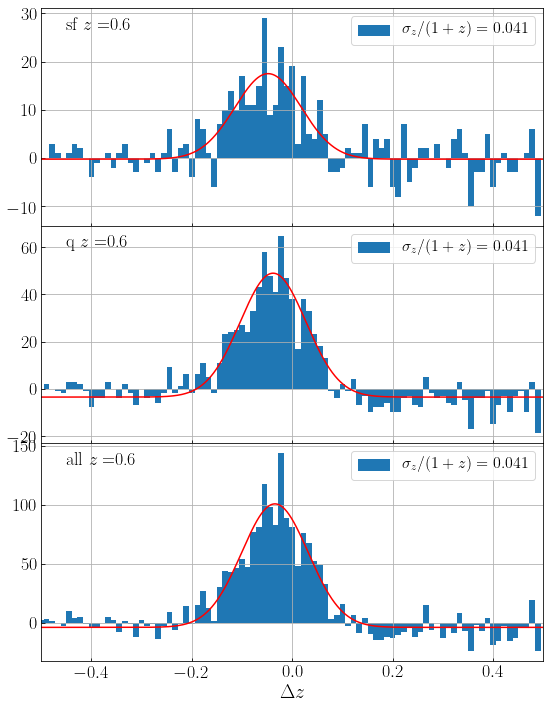

In [279]:
# read in data
z = 0.6
deltaz_arr = np.array([])
deltaz_rand_arr = np.array([])
fig, axs = plt.subplots(3, 1, figsize = (9, 12), sharex=True)

for i,sfq in enumerate(['sf','q','all']):
    for cat_name in['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep']:
        file = open('CUT_deep_catalogs/radial_dist_code/delta_z/cen_sat_pair/delta_z_close_pair_'+cat_name+'_'+str(z) + '_'+ sfq+'.txt').readlines()
        for line in file:
            line = line.rstrip()
            deltaz_arr = np.append(deltaz_arr, np.fromstring(line,sep=' '))
    
        file_rand = open('CUT_deep_catalogs/radial_dist_code/delta_z/cen_sat_pair/delta_z_random_pair_'+cat_name+'_'+str(z)+ '_'+ sfq+'.txt').readlines()
        for line in file_rand:
            line = line.rstrip()
            deltaz_rand_arr = np.append(deltaz_rand_arr, np.fromstring(line,sep=' '))
    
    n1, edges1 = np.histogram(deltaz_arr, range=(-0.5,0.5), bins=90)
    n2, edges2 = np.histogram(deltaz_rand_arr, range=(-0.5,0.5), bins=90)
    popt_gauss, pcov_gauss = curve_fit(_1gaussian, edges1[:-1], n1-n2, p0=[30,0,0.05,0])
    perr_gauss = np.sqrt(np.diag(pcov_gauss))
    
    x_plot = np.linspace(-0.5,0.5,1500)
    axs[i].plot(x_plot,_1gaussian(x_plot,popt_gauss[0],popt_gauss[1],popt_gauss[2],popt_gauss[3]),color='r')
    axs[i].bar(edges1[:-1], n1-n2, width=np.diff(edges1), label=r'$\sigma_z/(1+z)='+str(round(popt_gauss[2]/(1+z),3))+'$')

    axs[i].grid()
    axs[i].legend(fontsize=16)
    axs[i].set_xlim([-0.5,0.5])
    axs[i].annotate(sfq.replace('_','')+' $z=$'+str(z),xy=([0.05,0.9]),xycoords='axes fraction',fontsize=18)
    
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.xlabel(r'$\Delta z$',fontsize=20)
plt.show()

### pre-computing pairs

In [214]:
from astropy.coordinates import search_around_sky, SkyCoord

In [223]:
cat = Table.read('CUT_deep_catalogs/radial_dist_code/central_cat/central_cat_COSMOS_deep_0.6.fits')

In [224]:
coord_gals = SkyCoord(np.array(cat['RA']) * u.deg, np.array(cat['DEC']) * u.deg)

In [232]:
arr = search_around_sky(coord_gals, coord_gals, 0.05*u.deg)
arr2 = arr[2][arr[2].value > 1.5 / 3600]
arr0 = arr[0][arr[2].value > 1.5 / 3600]
arr1 = arr[1][arr[2].value > 1.5 / 3600]
abb = np.array(arr2.value.tolist())
abb

print(arr0)
print(arr1)

[11 12 31 32 52 52 53 53 54 54]
[12 11 32 31 53 54 52 54 52 53]


In [228]:
a,b=np.unique(np.round(abb,10),return_index=True)

In [231]:
print(arr0[b])
print(arr1[b])

[31 11 52 53 52]
[32 12 54 54 53]
